# Pasiphae field grid tests

In this notebook we test the field grid setup for the Pasiphae survey. We use the `fieldgrid` module to create and test the grids. The module was developed in the notebook `Develop_FieldGrid.ipynb`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.coordinates import Angle
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import fieldgrid
import visualizations as vis

## Tilted great circle grid

### Demonstration

We start with a great circle grid:

In [3]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
dec_lim_strict = True
gal_lat_lim = Angle(0. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(0. * u.deg)
frame_rot_ra = Angle(0. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, dec_lim_strict=dec_lim_strict, gal_lat_lim=gal_lat_lim.rad, 
        gal_lat_lim_strict=gal_lat_lim_strict, frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad,
        verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 45
    Number of declinations: 23
  Calculate field corners..
    Done                                                    
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: none
    Fields removed:        0
    Fields remaining:   1035
Final number of fields: 1035


In [ ]:
visualizer = vis.FieldGridVisualizer()

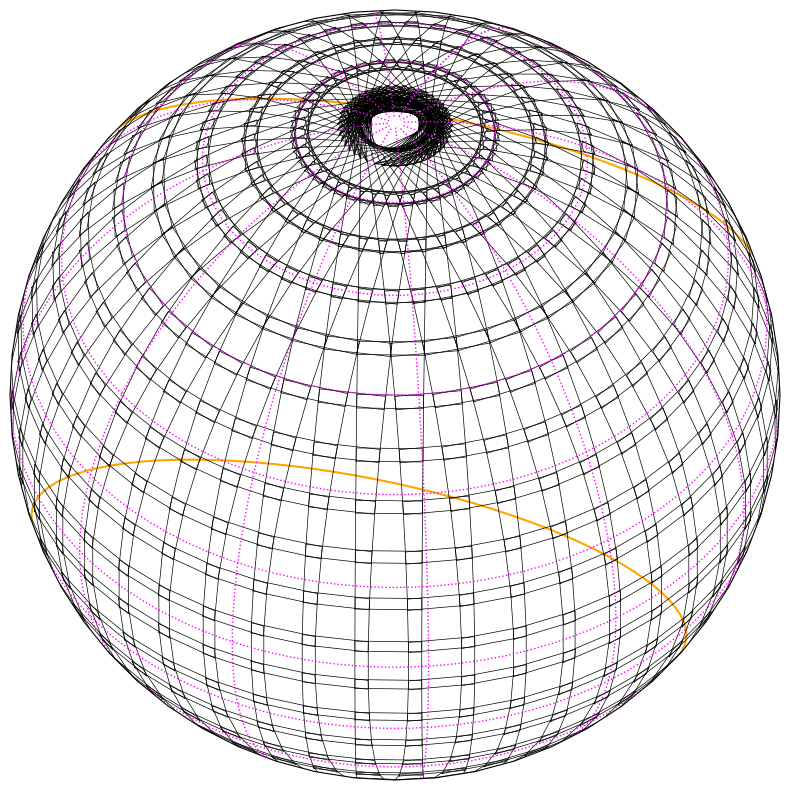

In [5]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

There is a lot of redudant overlap of fields the closer we get to the poles.
Next we rotate this grid such that the overlapping poles are moved into the Galactic plane, which we will discard:

In [6]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-25. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(90. * u.deg)
frame_rot_ra = Angle(110. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, dec_lim_strict=dec_lim_strict, gal_lat_lim=gal_lat_lim.rad, 
        gal_lat_lim_strict=gal_lat_lim_strict, frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad,
        verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 45
    Number of declinations: 23
    Rotate frame by 90.0 deg in declination
    Rotate frame by 110.0 deg in RA
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
    Galactic latitude limit: +/-30.0 deg
    Application: field corners
    Fields removed:   559
    Fields remaining: 476
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: -25.0
    Fields removed:       90
    Fields remaining:    386
Final number of fields: 386


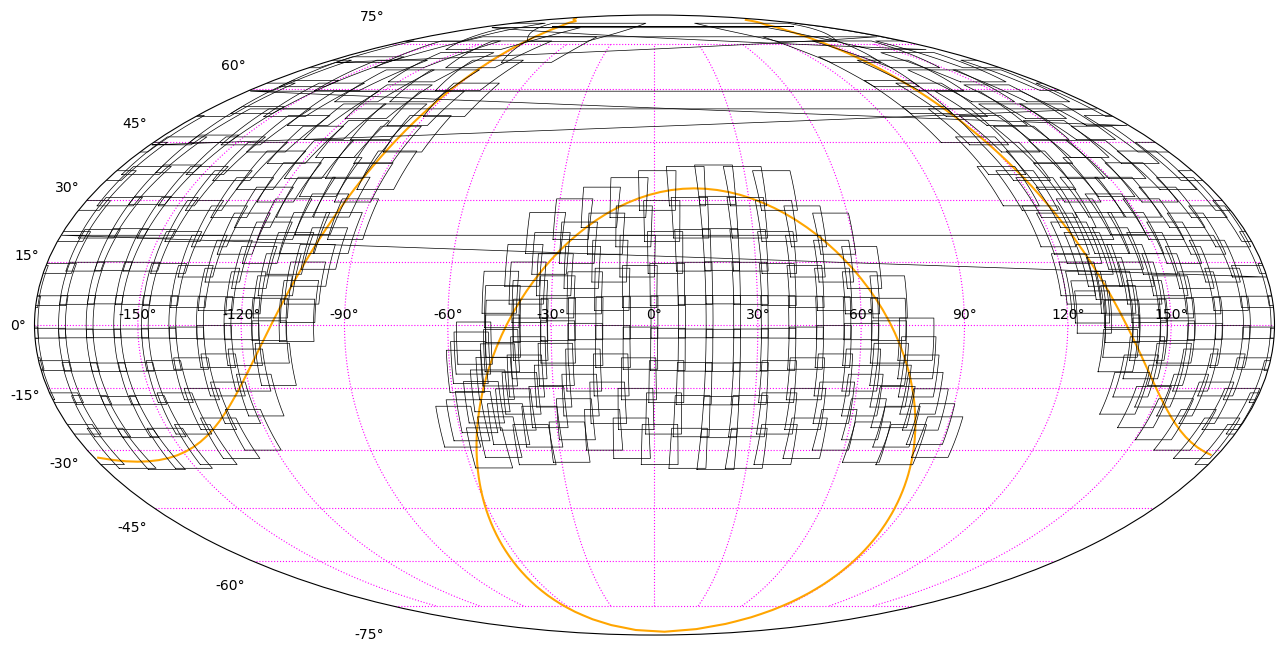

In [7]:
visualizer.mollweide(grid, b_lim=np.radians(30), outlines=True);

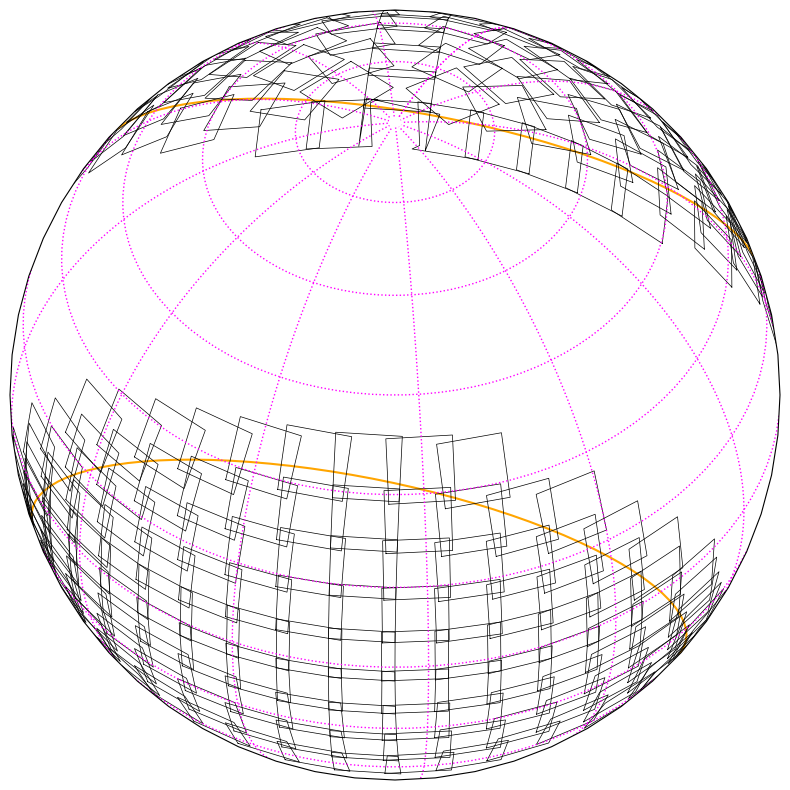

In [8]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

**Issues:**

1. There still is a lot of redundant overlap close to the tilted poles of the grid.
2. There are gaps near the true poles.

### Pasiphae Northern grid

In [9]:
fov = Angle(30. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(0. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
frame_rot_dec = Angle(90. * u.deg)
frame_rot_ra = Angle(110. * u.deg)
verbose = 2

grid = fieldgrid.FieldGridGrtCirc(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, dec_lim_strict=dec_lim_strict, gal_lat_lim=gal_lat_lim.rad, 
        gal_lat_lim_strict=gal_lat_lim_strict, frame_rot_ra=frame_rot_ra.rad, frame_rot_dec=frame_rot_dec.rad,
        verbose=verbose)

Create fields..
  Calculate field centers..
    Number of RA half circles: 772
    Number of declinations: 386
    Rotate frame by 90.0 deg in declination
    Rotate frame by 110.0 deg in RA
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
    Galactic latitude limit: +/-30.0 deg
    Application: field corners
    Fields removed:   185650
    Fields remaining: 112342
  Apply declination limits..
    Dec. lim. North: none
    Dec. lim. South: 0.0
    Fields removed:    55904
    Fields remaining:  56438
Final number of fields: 56438


In [3]:
def time_estimate(grid, time_obs, hours_per_night_avg, good_months, efficiency):
    n_fields = len(grid)
    total_hours = time_obs * n_fields / 60 # hours
    total_nights = total_hours / (hours_per_night_avg * efficiency)
    total_years = total_nights / (365 / 12) / good_months

    print(f'Total hours:  {total_hours:5.0f}')
    print(f'Total nights: {total_nights:5.0f}')
    print(f'Total years: {total_years:6.1f}')

In [11]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   3292
Total nights:   412
Total years:    3.0


#### Show

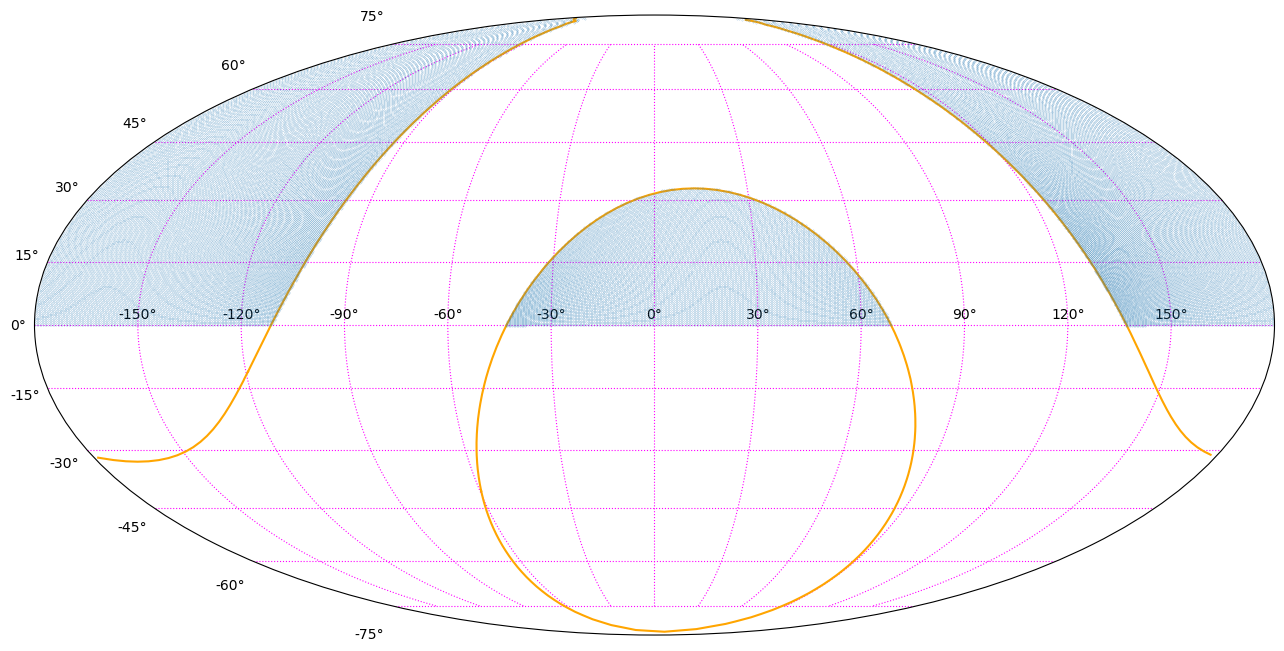

In [12]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

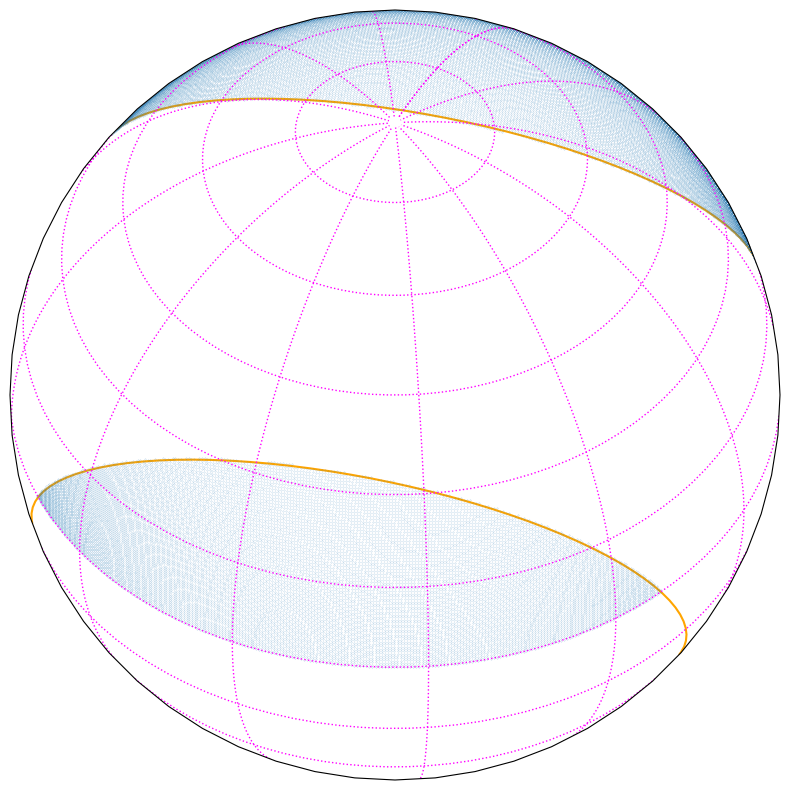

In [13]:
visualizer.orthographic(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [14]:
load = True
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: tilted great circle grid
Fields: 56438
Test points: 100000

In [15]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [16]:
load = True
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: tilted great circle grid
Fields: 56438
Test points: 100000

In [17]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [18]:
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [19]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 2464


##### Where are gaps located?

In [20]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [21]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


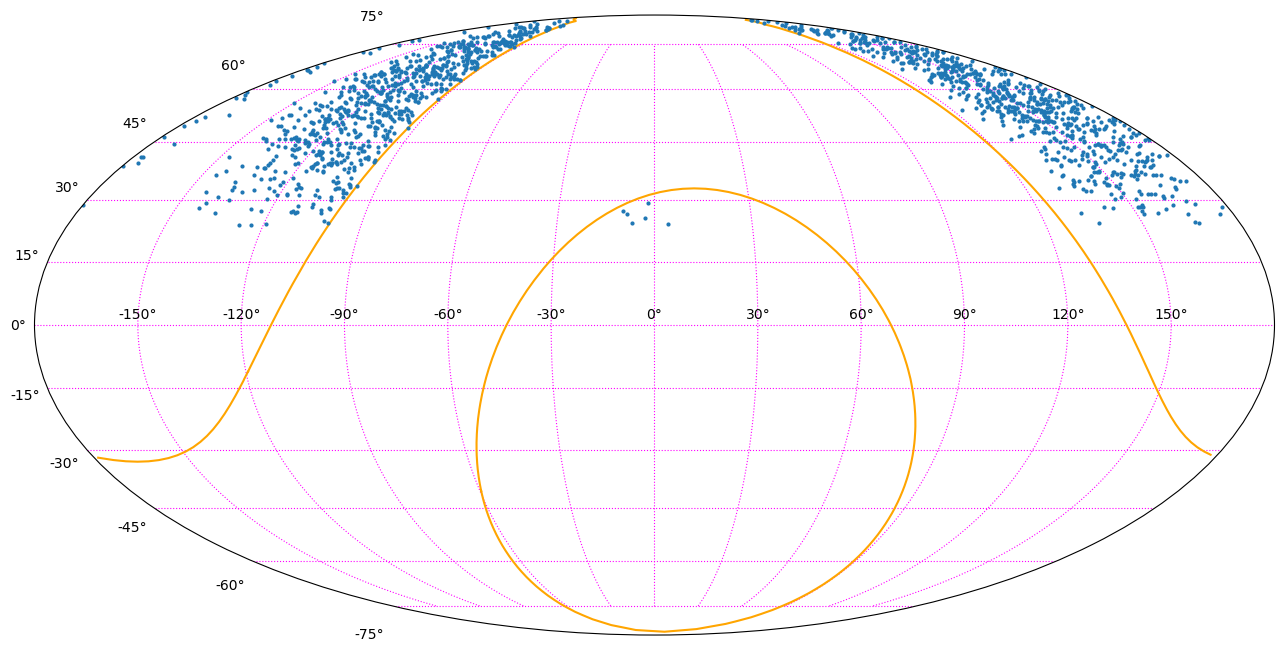

In [22]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

#### Test for overlap

In [23]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [24]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 1.5e-02
Sky fraction with single field:        64.5 %
Sky fraction with overlapping fields:  34.0 %



region  n_points  fraction
0                  gaps      1508   0.01508
1          single field     64452   0.64452
2  2 fields overlapping     31945   0.31945
3  3 fields overlapping      1897   0.01897
4  4 fields overlapping       193   0.00193
5  5 fields overlapping         4   0.00004

#### Where are overlapping areas located?

In [25]:
sampler='spherical'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [26]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


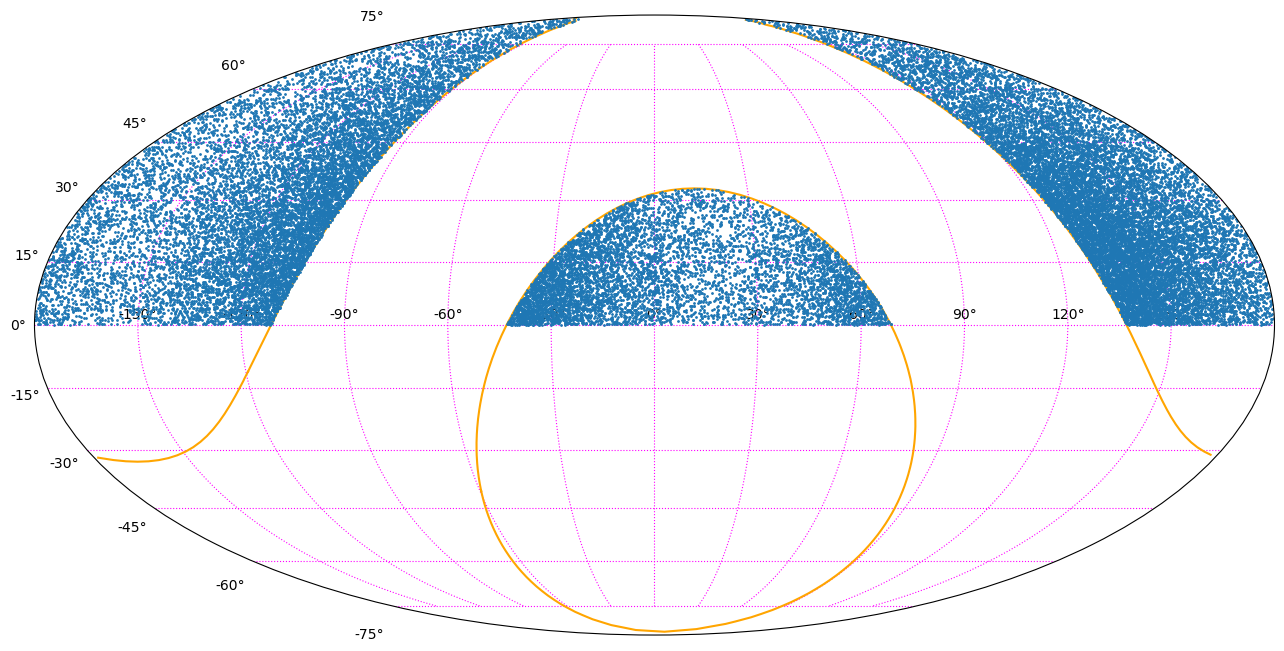

In [27]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [28]:
sampler='radec'
filename = f'gridtests/GridGrtCirc_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [29]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(0, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

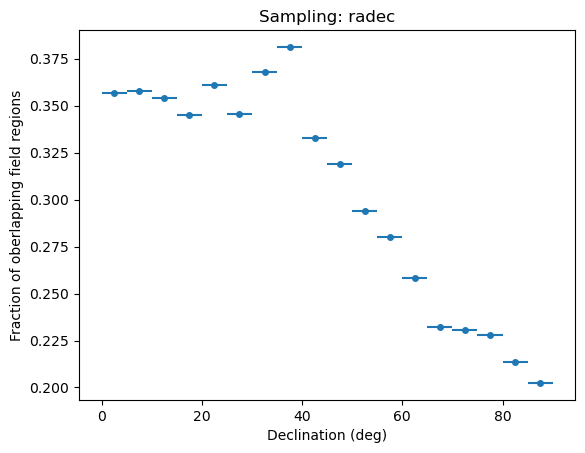

In [30]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

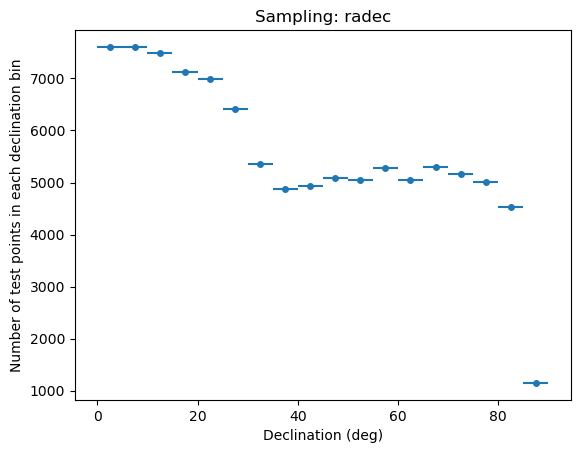

In [31]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

## Isolatitudinal grid

### Demonstration

In [32]:
fov = Angle(10. * u.deg)
overlap = Angle(2. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(0. * u.deg)
gal_lat_lim_strict = True
verbose = 2

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
    Number of declination circles: 23
    Dec: -88.00 deg. Closing gaps. Number of fields:      6
    Dec: -80.00 deg. Closing gaps. Number of fields:     10
    Dec: -72.00 deg. Closing gaps. Number of fields:     15
    Dec: -64.00 deg. Number of fields:     19
    Dec: -56.00 deg. Number of fields:     25
    Dec: -48.00 deg. Number of fields:     30
    Dec: -40.00 deg. Number of fields:     34
    Dec: -32.00 deg. Number of fields:     38
    Dec: -24.00 deg. Number of fields:     41
    Dec: -16.00 deg. Number of fields:     43
    Dec:  -8.00 deg. Number of fields:     44
    Dec:  -0.00 deg. Number of fields:     45
    Dec:  +8.00 deg. Number of fields:     44
    Dec: +16.00 deg. Number of fields:     43
    Dec: +24.00 deg. Number of fields:     41
    Dec: +32.00 deg. Number of fields:     38
    Dec: +40.00 deg. Number of fields:     34
    Dec: +48.00 deg. Number of fields:     30
    Dec: +56.00 deg. Number of fields:     25
  

In [33]:
visualizer = vis.FieldGridVisualizer()

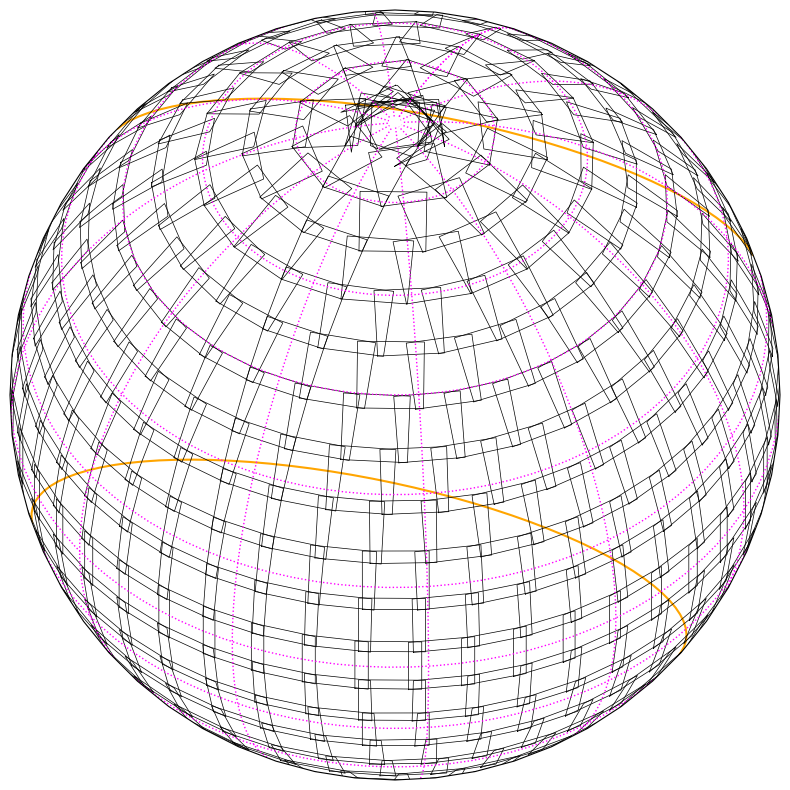

In [34]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

### Pasiphae Northern grid

In [6]:
fov = Angle(30. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(0. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 93629


In [7]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   5462
Total nights:   683
Total years:    5.0


#### Show

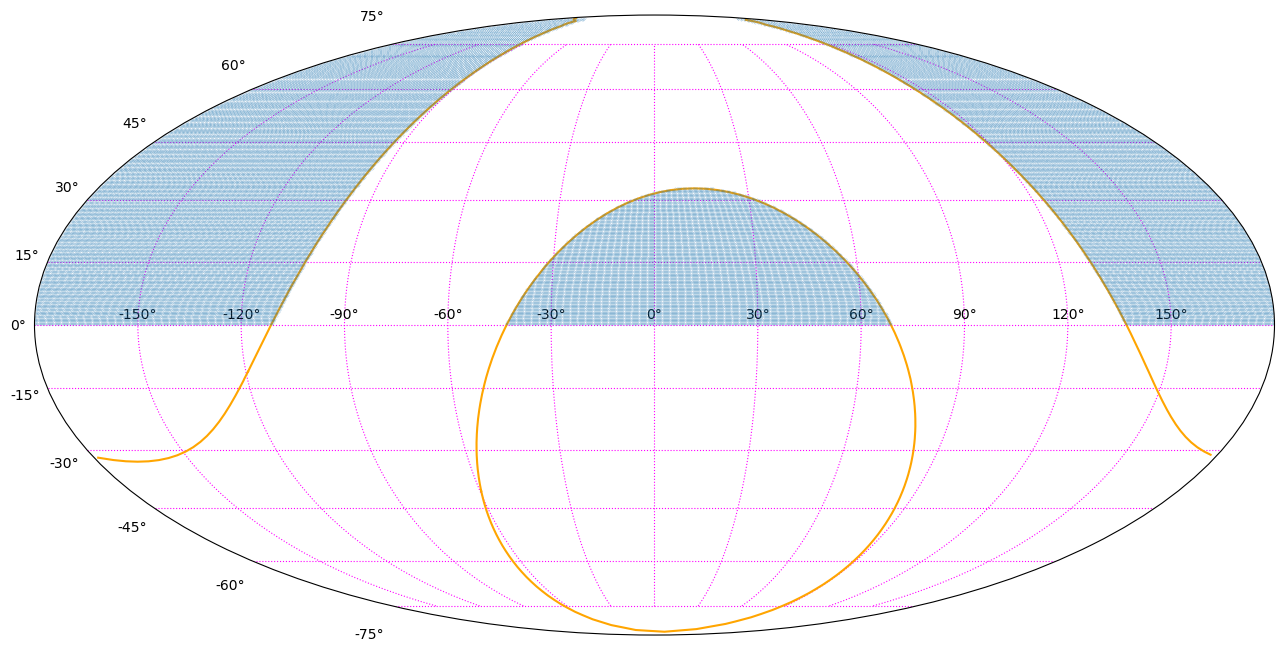

In [ ]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [38]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 47834
Test points: 100000

In [39]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [40]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 47834
Test points: 100000

In [41]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [42]:
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [43]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [44]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [45]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [46]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [47]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [48]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:        86.2 %
Sky fraction with overlapping fields:  13.8 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field     86216   0.86216
2  2 fields overlapping     12828   0.12828
3  3 fields overlapping       851   0.00851

#### Where are overlapping areas located?

In [49]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [50]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


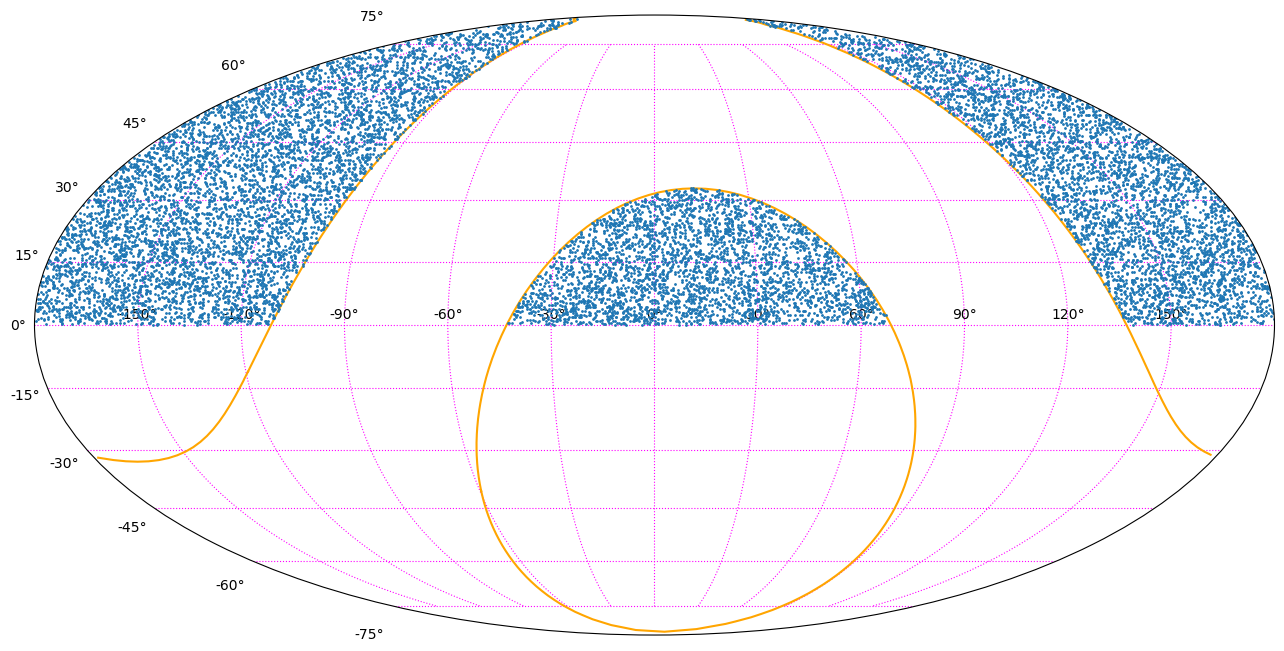

In [51]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [52]:
sampler='radec'
filename = f'gridtests/GridIsoLat_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [53]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(0, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

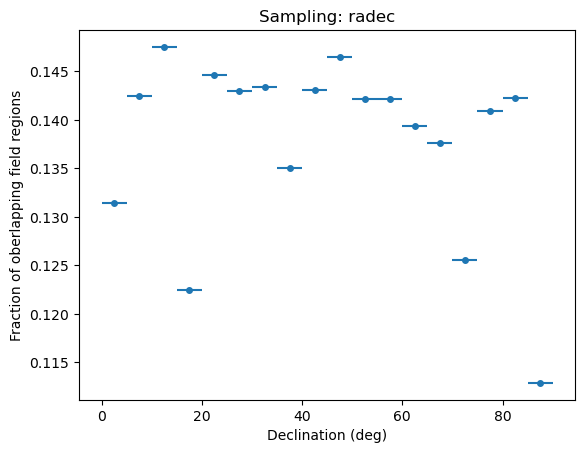

In [54]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

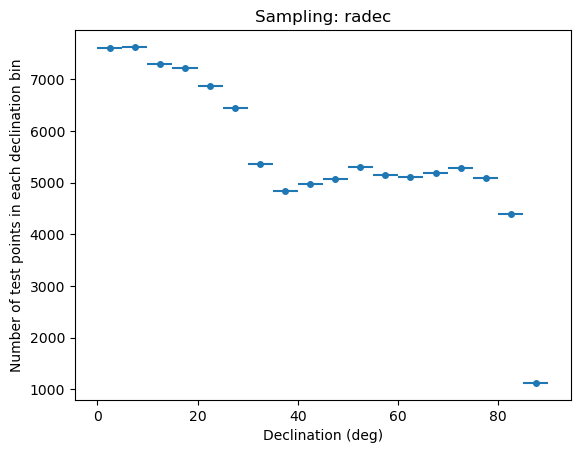

In [55]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

### Pasiphae Southern grid

In [56]:
fov = Angle(35. * u.arcmin)
overlap = Angle(2. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(0. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap.rad, overlap_ew=overlap.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 34530


In [57]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   2014
Total nights:   252
Total years:    1.8


#### Show

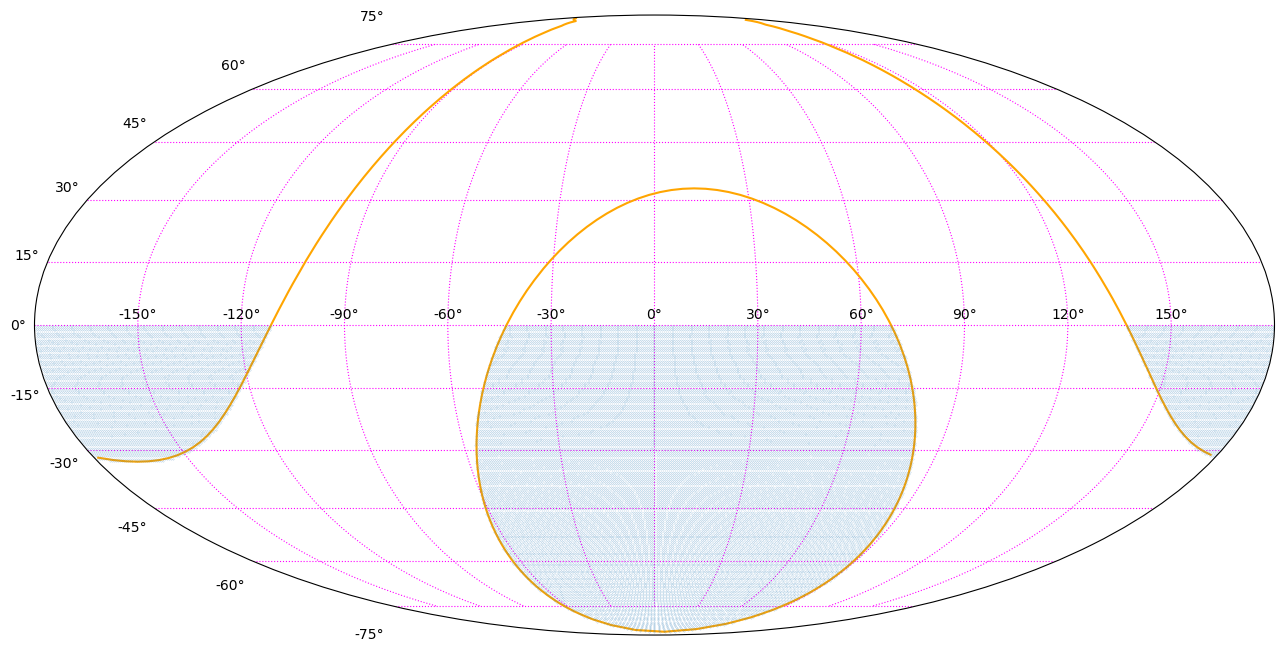

In [58]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

#### Run tests with spherical sampler

In [59]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 34530
Test points: 100000

In [60]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [61]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 34530
Test points: 100000

In [62]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [63]:
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [64]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [65]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [66]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [67]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [68]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [69]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:        88.5 %
Sky fraction with overlapping fields:  11.5 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field     88464   0.88464
2  2 fields overlapping     10913   0.10913
3  3 fields overlapping       577   0.00577

#### Where are overlapping areas located?

In [70]:
sampler='spherical'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [71]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


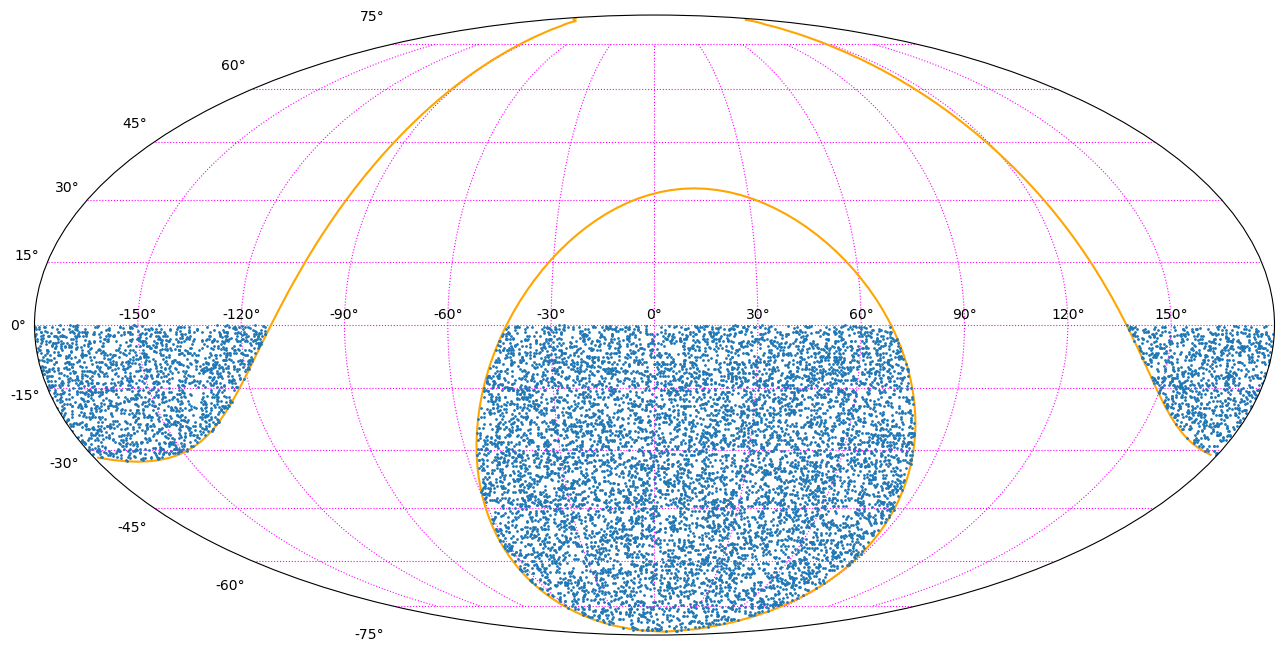

In [72]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [73]:
sampler='radec'
filename = f'gridtests/GridIsoLat_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [74]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-90, 0.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

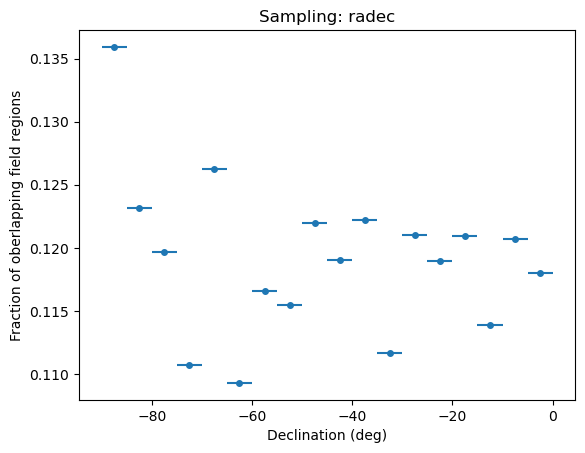

In [75]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

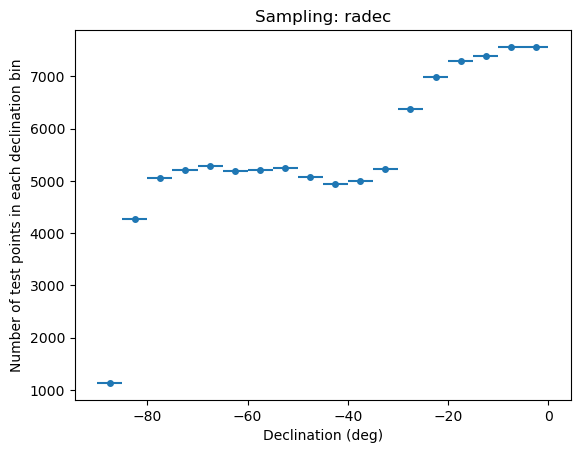

In [76]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

## Isolatitudinal grid with half overlapping declination rings

We decided that we may need to observe the entire sky twice on different parts of the CCD. Two observations will allow for cross-checks. Observations of the same target on different parts of the CCD allow to get rid of poor estimates in the problematic CCD region, without loosing such stars entirely.

### Demonstration

In [77]:
fov = Angle(10. * u.deg)
overlap_ns = Angle(5. * u.deg)
overlap_ew = Angle(0. * u.deg)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
    Number of declination circles: 35
    Dec: -85.00 deg. Closing gaps. Number of fields:      7
    Dec: -80.00 deg. Closing gaps. Number of fields:     10
    Dec: -75.00 deg. Closing gaps. Number of fields:     13
    Dec: -70.00 deg. Closing gaps. Number of fields:     16
    Dec: -65.00 deg. Closing gaps. Number of fields:     19
    Dec: -60.00 deg. Closing gaps. Number of fields:     21
    Dec: -55.00 deg. Closing gaps. Number of fields:     24
    Dec: -50.00 deg. Closing gaps. Number of fields:     26
    Dec: -45.00 deg. Closing gaps. Number of fields:     28
    Dec: -40.00 deg. Closing gaps. Number of fields:     30
    Dec: -35.00 deg. Closing gaps. Number of fields:     32
    Dec: -30.00 deg. Closing gaps. Number of fields:     33
    Dec: -25.00 deg. Closing gaps. Number of fields:     34
    Dec: -20.00 deg. Closing gaps. Number of fields:     35
    Dec: -15.00 deg. Closing gaps. Number of fields:     36
    Dec: -10.00 de

In [78]:
visualizer = vis.FieldGridVisualizer()

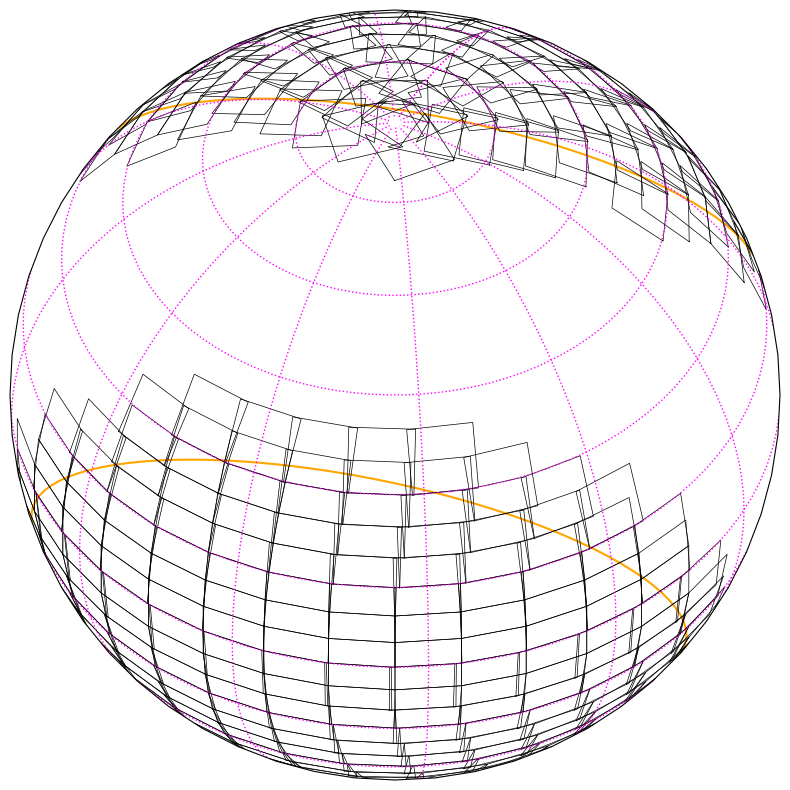

In [79]:
visualizer.orthographic(grid, b_lim=np.radians(30), outlines=True);

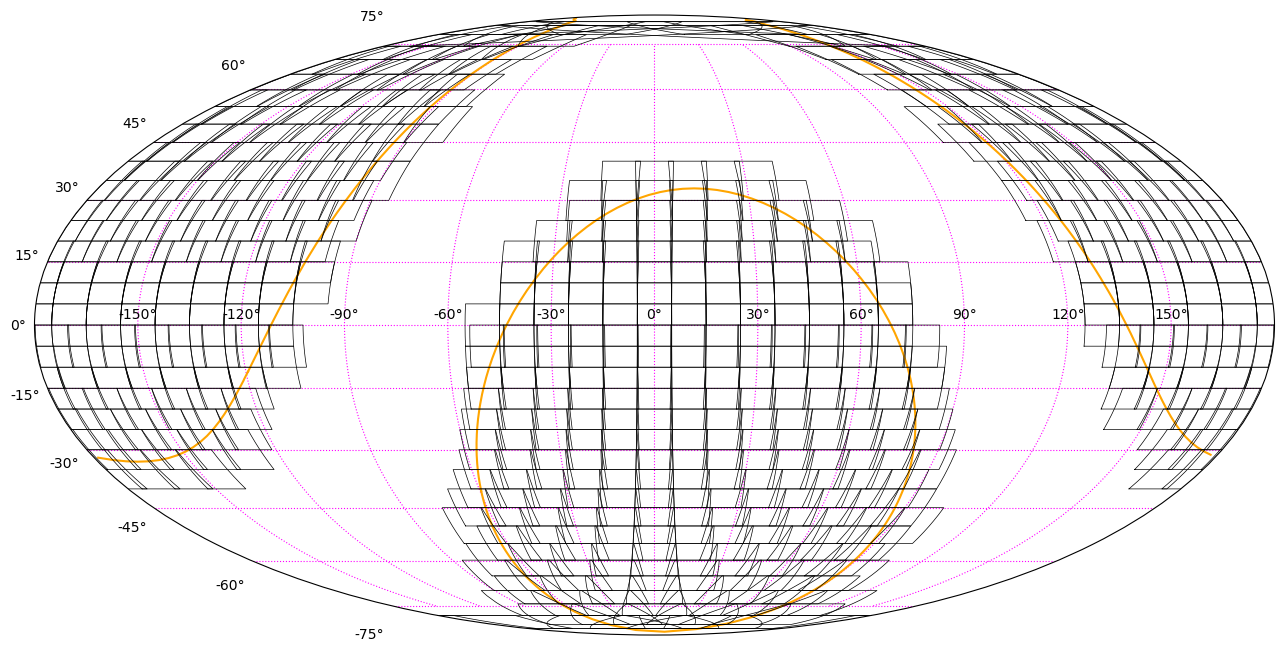

In [80]:
visualizer.mollweide(grid, b_lim=np.radians(30), outlines=True);

### Pasiphae Northern grid

In [81]:
fov = Angle(30. * u.arcmin)
overlap_ns = fov / 2.
overlap_ew = Angle(0. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = -fov / 2.
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 83891


In [82]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   4894
Total nights:   612
Total years:    4.5


#### Show

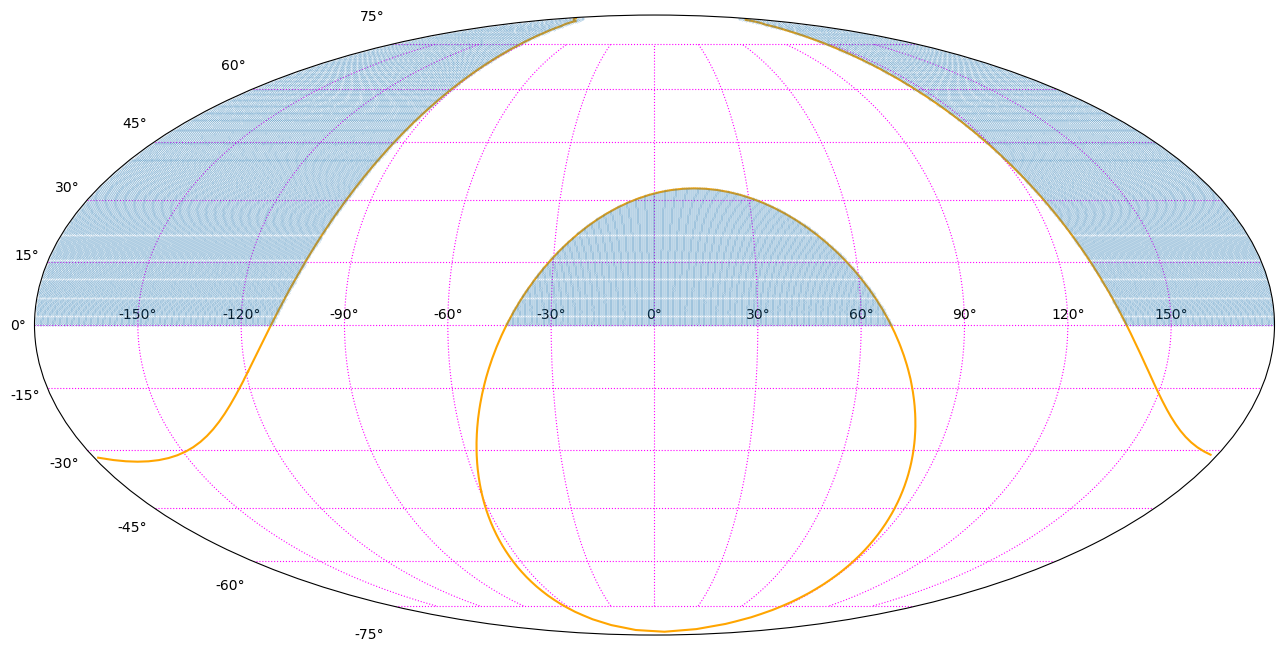

In [83]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

Zoom on some region to visualize the grid setup:

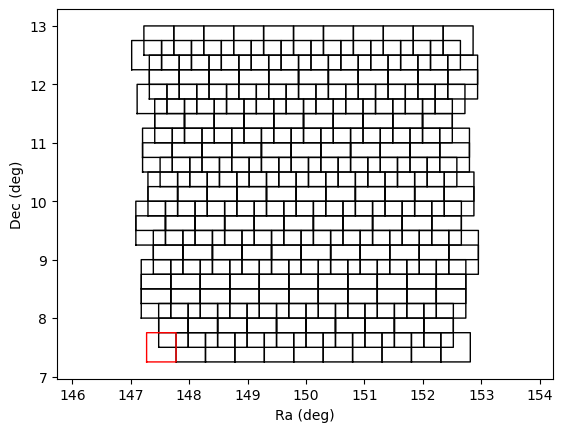

In [84]:
ra_center = Angle(150 * u.deg)
dec_center = Angle(10 * u.deg)
radec_range = Angle(6 * u.deg)

sel = np.logical_and.reduce([
        np.all(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    if i == 0:
        plt.plot(ra, dec, linestyle='-', lw=1, color='r', zorder=1)
    else:
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.gca().axis('equal')
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Run tests with spherical sampler

In [85]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 83891
Test points: 100000

In [86]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [87]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 83891
Test points: 100000

In [88]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [89]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [90]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [91]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [92]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [93]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [94]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [95]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:         0.6 %
Sky fraction with overlapping fields:  99.4 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field       564   0.00564
2  2 fields overlapping     98488   0.98488
3  3 fields overlapping       911   0.00911

#### Where are points located that are only covered by single fields?

In [96]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [97]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


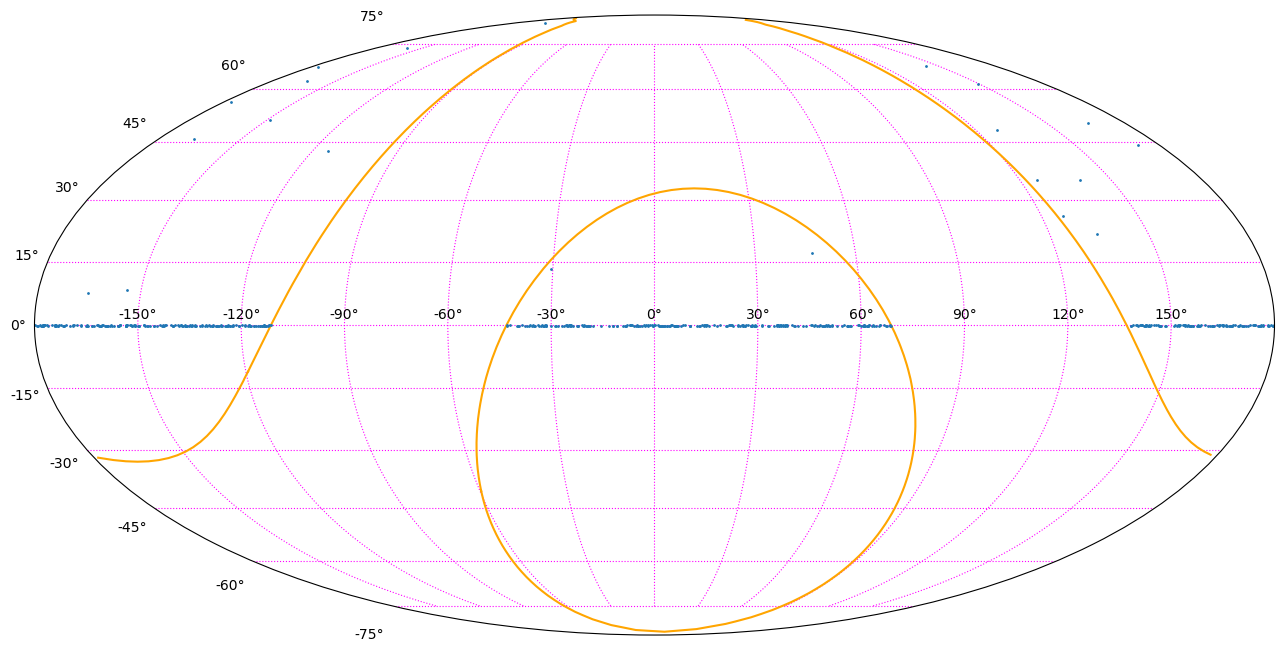

In [98]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

In [99]:
results = pd.DataFrame(tester.get_results())
n_points = results.shape[0]
sel = np.logical_and(results['n_fields'] == 1, results['dec'] > 0)
results = results.loc[sel].reset_index(drop=True)
print(f'total: {results.shape[0]} out of {n_points}\nratio: {results.shape[0] / n_points:.2e}')

total: 21 out of 100000
ratio: 2.10e-04


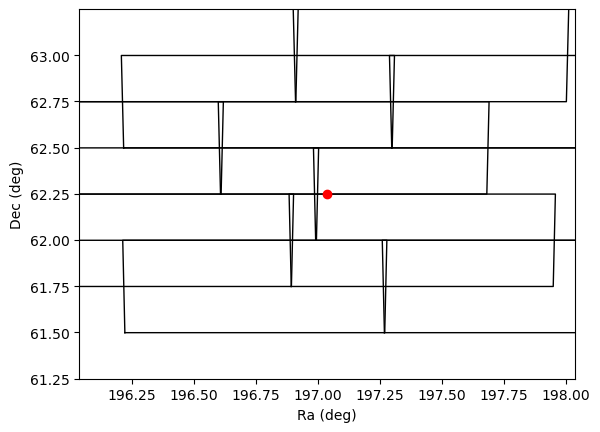

In [100]:
i  = 0
ra_center = Angle(results.loc[i, 'ra'] * u.rad)
dec_center = Angle(results.loc[i, 'dec'] * u.rad)
radec_range = Angle(1 * u.deg)

sel = np.logical_and.reduce([
        np.any(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.any(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.any(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.any(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
    
plt.plot(ra_center.deg, dec_center.deg, marker='o', color='r')
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.ylim(dec_center.deg - radec_range.deg, dec_center.deg + radec_range.deg)
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Where are overlapping areas located?

In [101]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [102]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

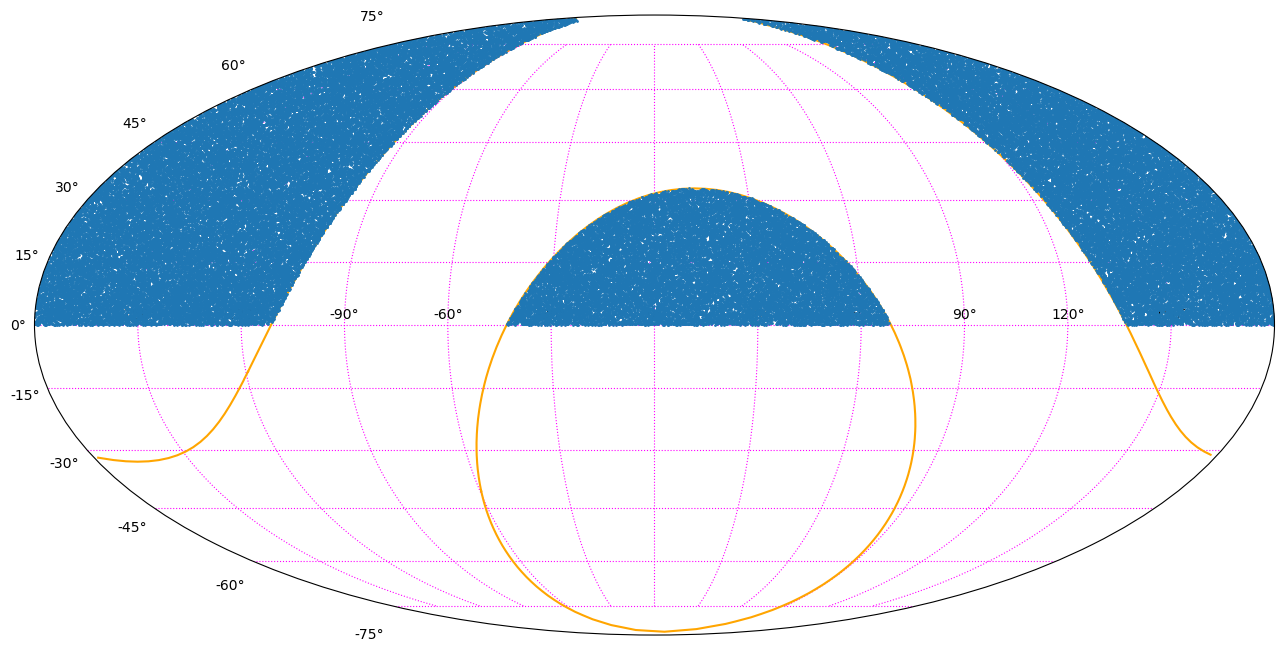

In [103]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### Where are more than two fields overlapping?

In [104]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [105]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 2
results = results.loc[sel].reset_index(drop=True)

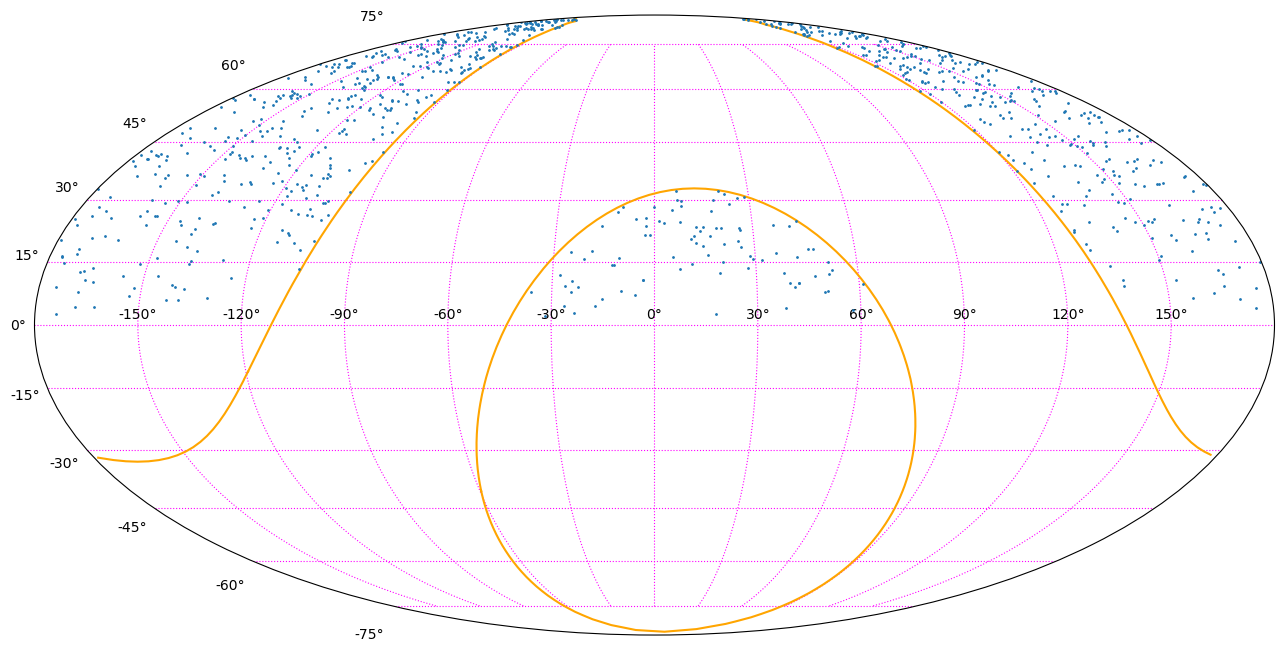

In [106]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [107]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [108]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(0, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

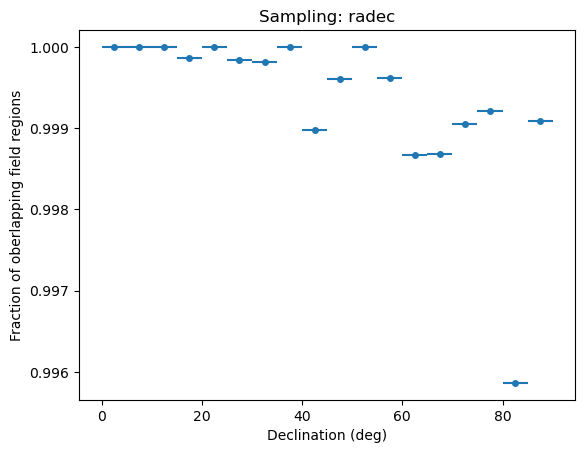

In [109]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

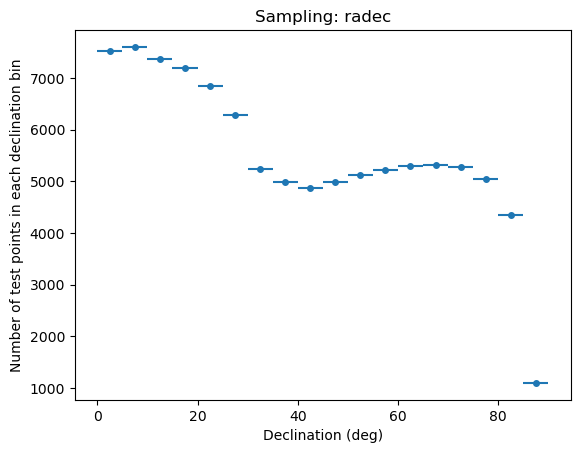

In [110]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

### Pasiphae Southern grid

In [111]:
fov = Angle(35. * u.arcmin)
overlap_ns = fov / 2.
overlap_ew = Angle(0. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = fov / 2.
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 61889


In [112]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   3610
Total nights:   451
Total years:    3.3


#### Show

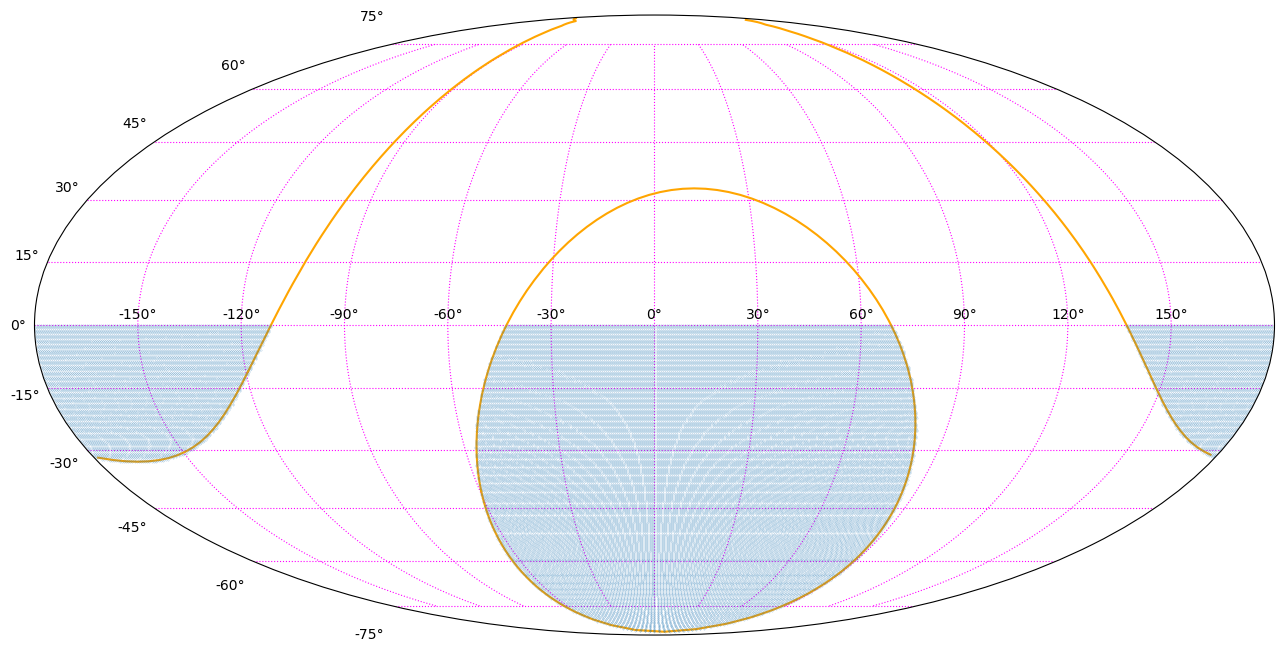

In [113]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

Zoom on some region to visualize the grid setup:

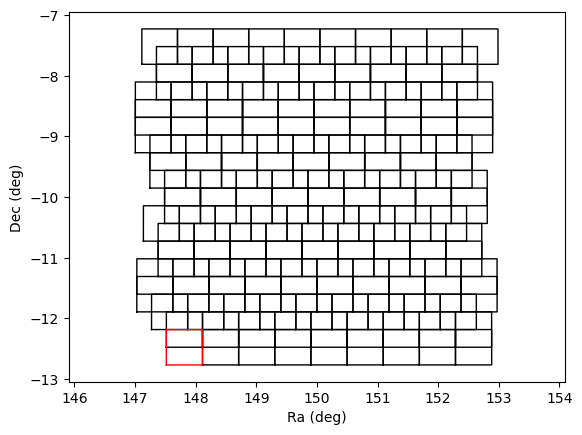

In [114]:
ra_center = Angle(150 * u.deg)
dec_center = Angle(-10 * u.deg)
radec_range = Angle(6 * u.deg)

sel = np.logical_and.reduce([
        np.all(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    if i == 0:
        plt.plot(ra, dec, linestyle='-', lw=1, color='r', zorder=1)
    else:
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.gca().axis('equal')
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Run tests with spherical sampler

In [115]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 61889
Test points: 100000

In [116]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [117]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 61889
Test points: 100000

In [118]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [119]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [120]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [121]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [122]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [123]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [124]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [125]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:         0.5 %
Sky fraction with overlapping fields:  99.5 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field       534   0.00534
2  2 fields overlapping     98387   0.98387
3  3 fields overlapping      1048   0.01048

#### Where are points located that are only covered by single fields?

In [126]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [127]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


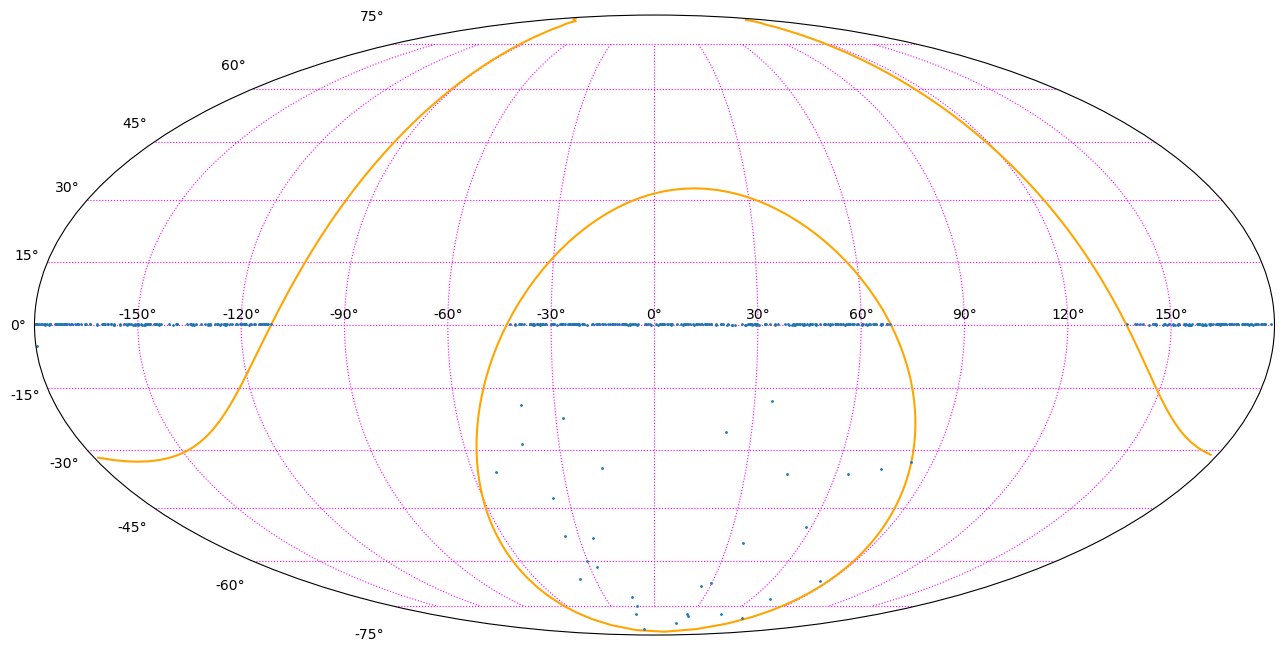

In [128]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

In [129]:
results = pd.DataFrame(tester.get_results())
n_points = results.shape[0]
sel = np.logical_and(results['n_fields'] == 1, results['dec'] < 0)
results = results.loc[sel].reset_index(drop=True)
print(f'total: {results.shape[0]} out of {n_points}\nratio: {results.shape[0] / n_points:.2e}')

total: 33 out of 100000
ratio: 3.30e-04


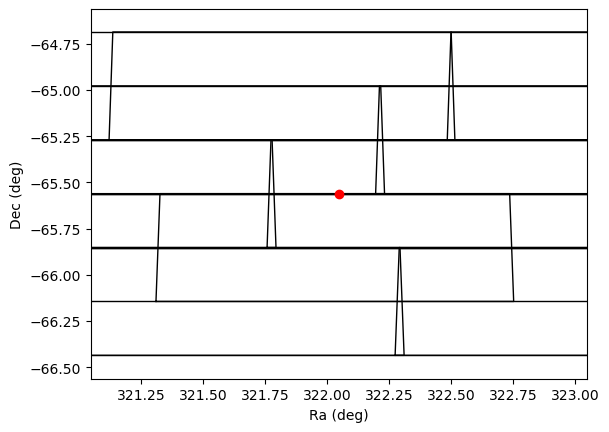

In [130]:
i  = 0
ra_center = Angle(results.loc[i, 'ra'] * u.rad)
dec_center = Angle(results.loc[i, 'dec'] * u.rad)
radec_range = Angle(1 * u.deg)

sel = np.logical_and.reduce([
        np.any(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.any(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.any(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.any(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
    
plt.plot(ra_center.deg, dec_center.deg, marker='o', color='r')
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.ylim(dec_center.deg - radec_range.deg, dec_center.deg + radec_range.deg)
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Where are overlapping areas located?

In [131]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [132]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

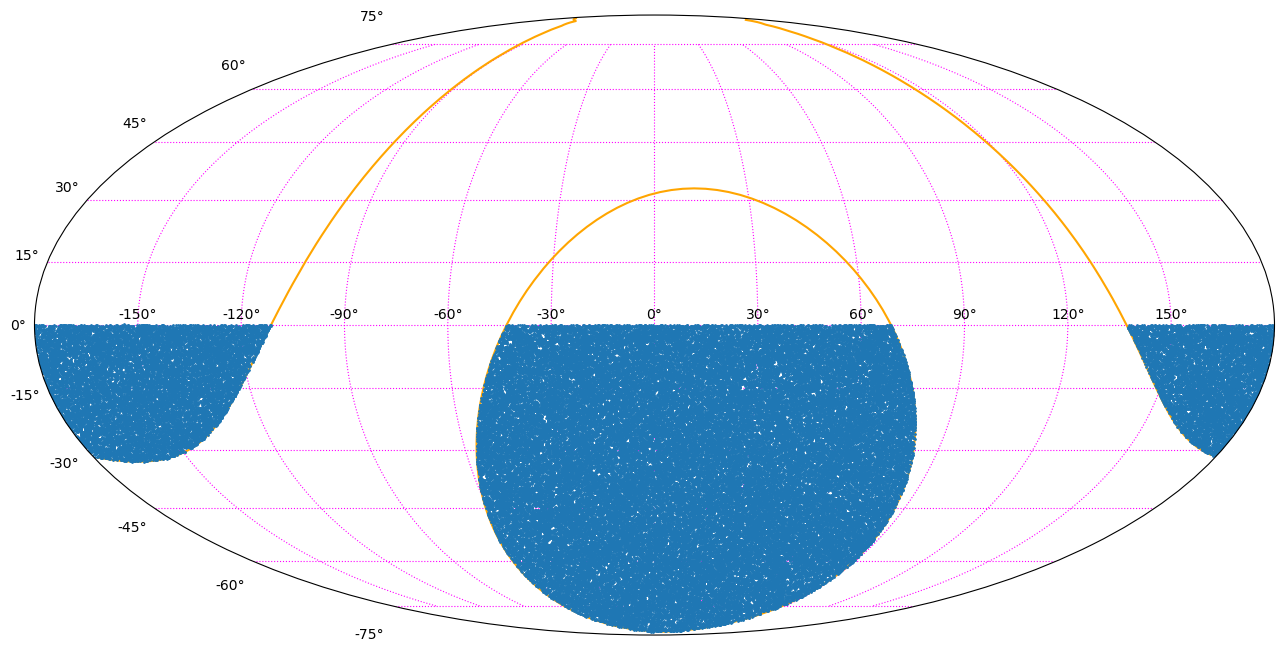

In [133]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### Where are more than two fields overlapping?

In [134]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [135]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 2
results = results.loc[sel].reset_index(drop=True)

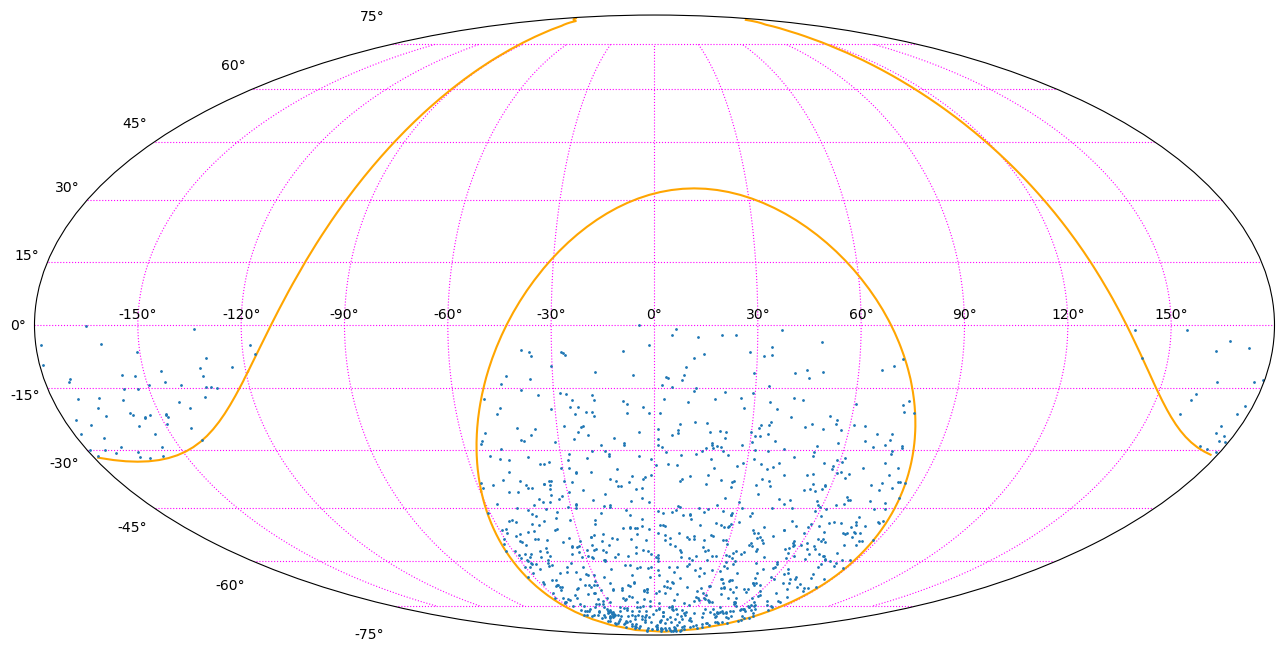

In [136]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [137]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLdec_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [138]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-90, 0.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

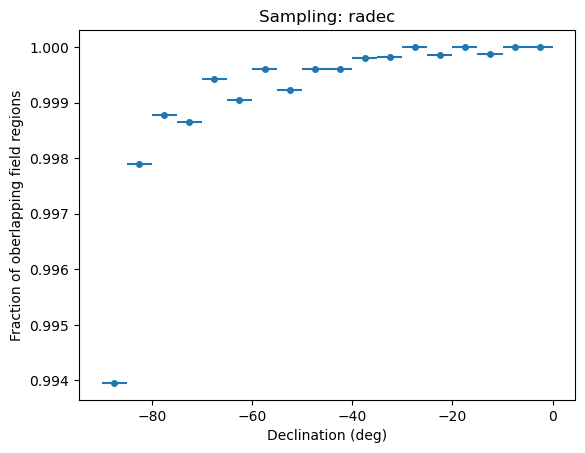

In [139]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

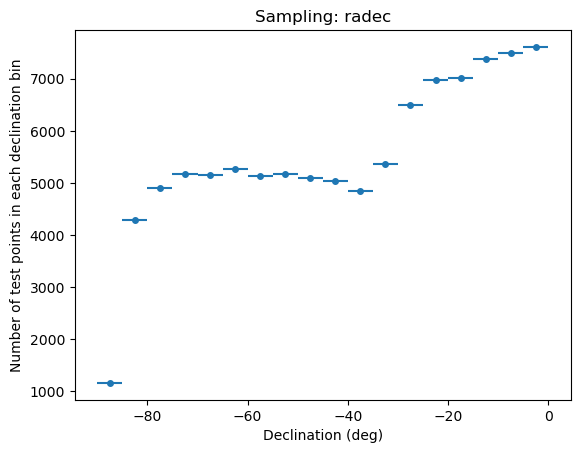

In [140]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

## Isolatitudinal grid with half overlapping declination rings plus additional overlap

We decided that we may need to observe the entire sky twice on different parts of the CCD. Two observations will allow for cross-checks. Observations of the same target on different parts of the CCD allow to get rid of poor estimates in the problematic CCD region, without loosing such stars entirely.

### Pasiphae Northern grid

In [141]:
fov = Angle(30. * u.arcmin)
psf = Angle(10. * u.arcsec)
overlap_ns = fov / 2. + psf
overlap_ew = psf
tilt = Angle(0.* u.deg)
dec_lim_north = Angle(90. * u.deg)
dec_lim_south = -fov / 2.
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 85300


In [142]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   4976
Total nights:   622
Total years:    4.5


#### Show

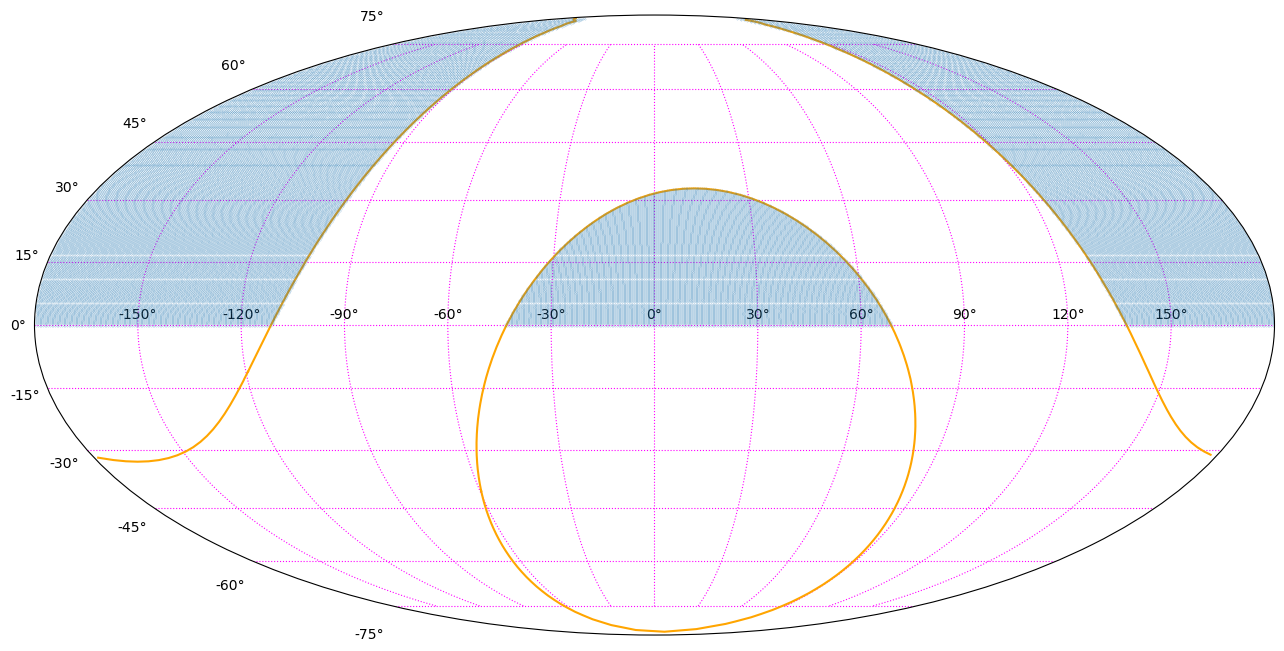

In [143]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

Zoom on some region to visualize the grid setup:

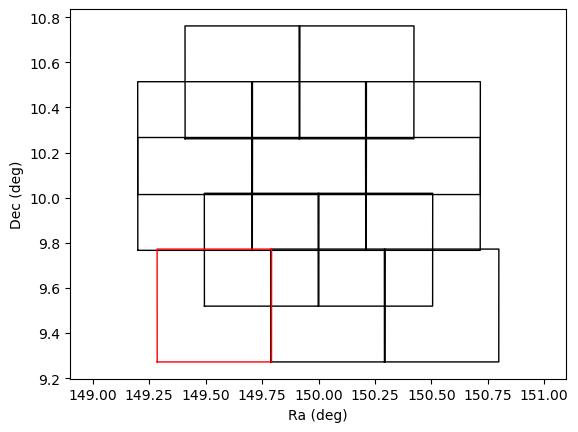

In [144]:
ra_center = Angle(150 * u.deg)
dec_center = Angle(10 * u.deg)
radec_range = Angle(1.8 * u.deg)

sel = np.logical_and.reduce([
        np.all(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    if i == 0:
        plt.plot(ra, dec, linestyle='-', lw=1, color='r', zorder=1)
    else:
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.gca().axis('equal')
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Run tests with spherical sampler

In [145]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 85300
Test points: 100000

In [146]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [147]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 85300
Test points: 100000

In [148]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [149]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [150]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [151]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [152]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [153]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [154]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [155]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:         0.3 %
Sky fraction with overlapping fields:  99.7 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field       289   0.00289
2  2 fields overlapping     96252   0.96252
3  3 fields overlapping      3292   0.03292
4  4 fields overlapping       164   0.00164
5  5 fields overlapping         2   0.00002

#### Where are points located that are only covered by single fields?

In [156]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [157]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


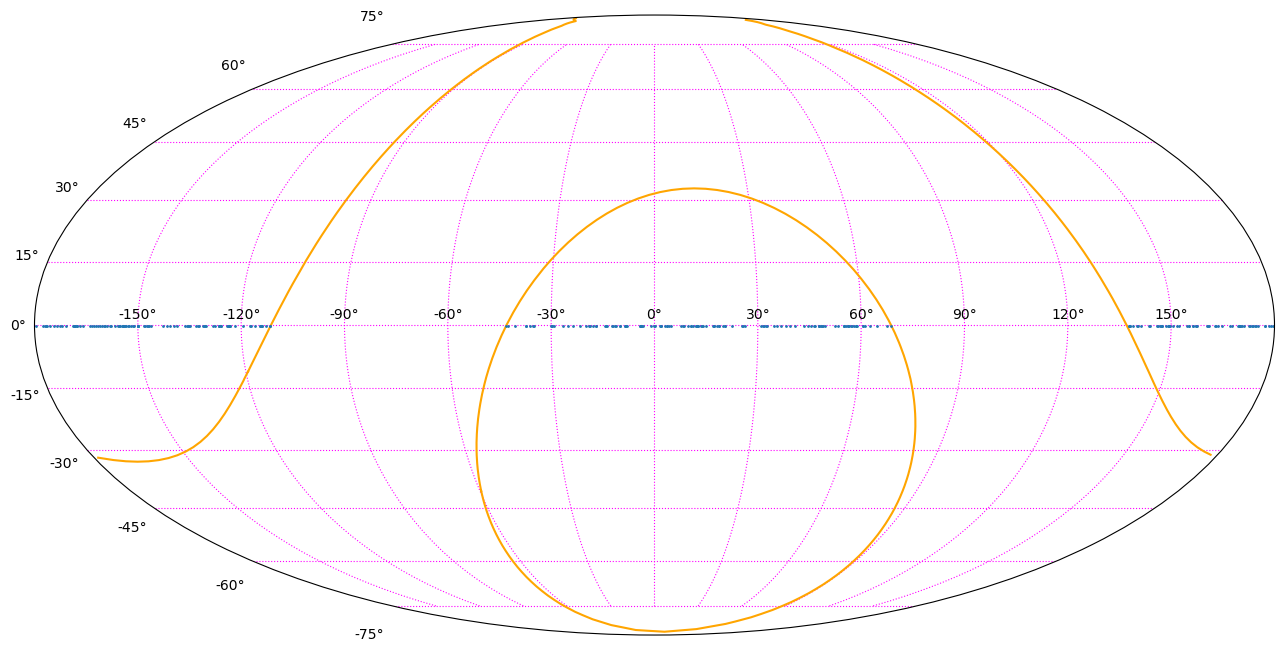

In [158]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

In [159]:
results = pd.DataFrame(tester.get_results())
n_points = results.shape[0]
sel = np.logical_and(results['n_fields'] == 1, results['dec'] > 0)
results = results.loc[sel].reset_index(drop=True)
print(f'total: {results.shape[0]} out of {n_points}\nratio: {results.shape[0] / n_points:.2e}')

total: 0 out of 100000
ratio: 0.00e+00


In [160]:
i  = 0

try:
    ra_center = Angle(results.loc[i, 'ra'] * u.rad)
    dec_center = Angle(results.loc[i, 'dec'] * u.rad)
    radec_range = Angle(1 * u.deg)

    sel = np.logical_and.reduce([
            np.any(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
            np.any(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
            np.any(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
            np.any(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
            ])
    for i in range(np.sum(sel)):
        ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
        dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)

    plt.plot(ra_center.deg, dec_center.deg, marker='o', color='r')
    plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
    plt.ylim(dec_center.deg - radec_range.deg, dec_center.deg + radec_range.deg)
    plt.xlabel('Ra (deg)')
    plt.ylabel('Dec (deg)');
except:
    pass

#### Where are overlapping areas located?

In [161]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [162]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

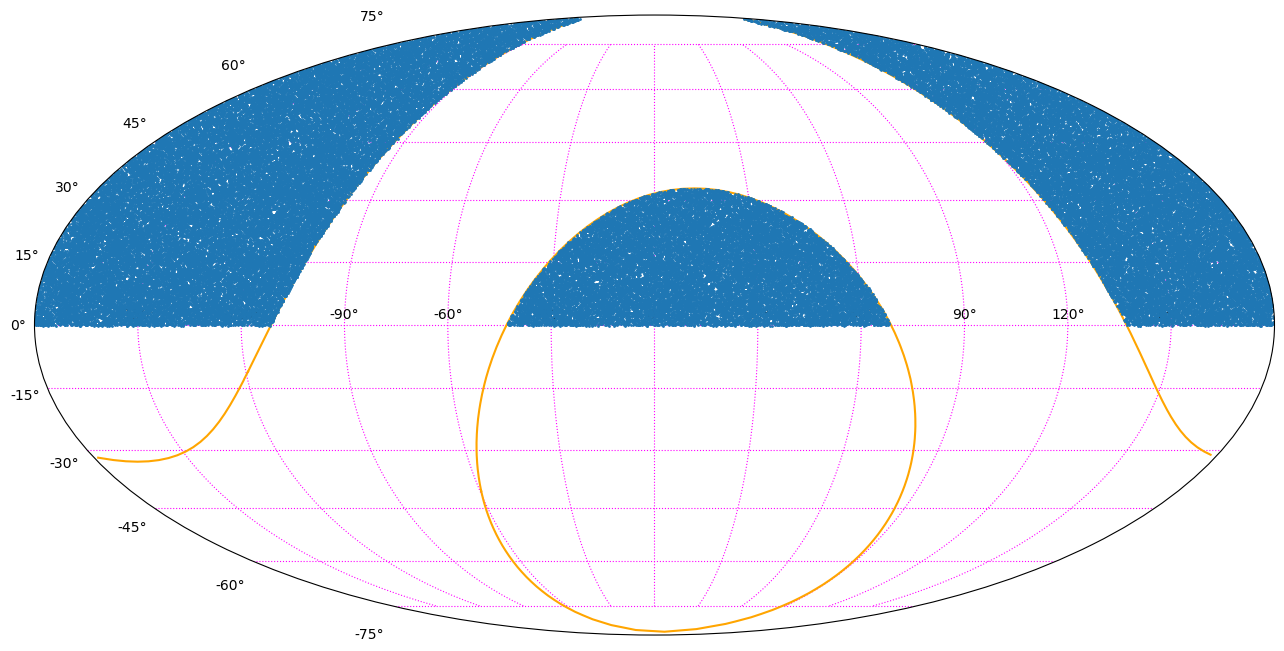

In [163]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### Where are more than two fields overlapping?

In [164]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [165]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 2
results = results.loc[sel].reset_index(drop=True)

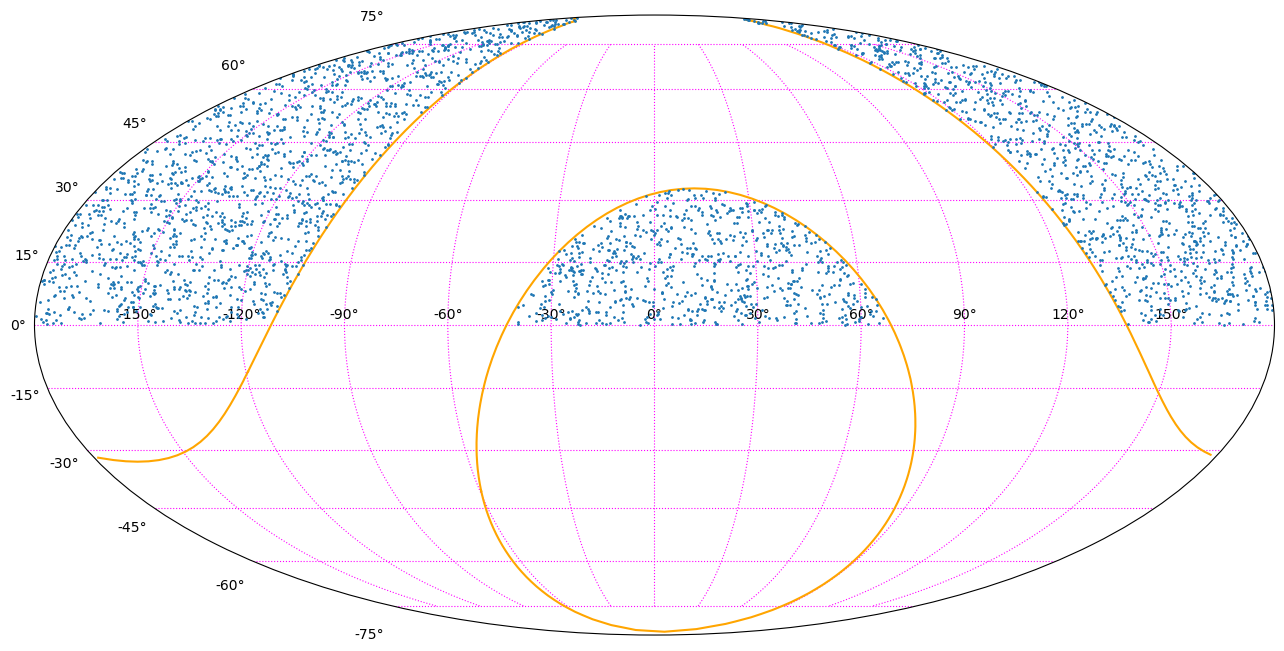

In [166]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [167]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_N_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [168]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(0, 90.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

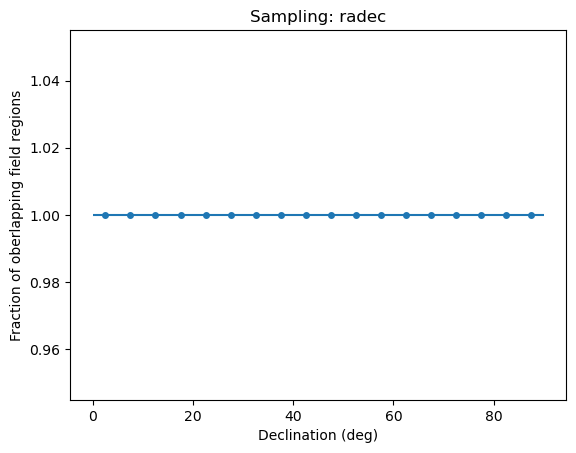

In [169]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

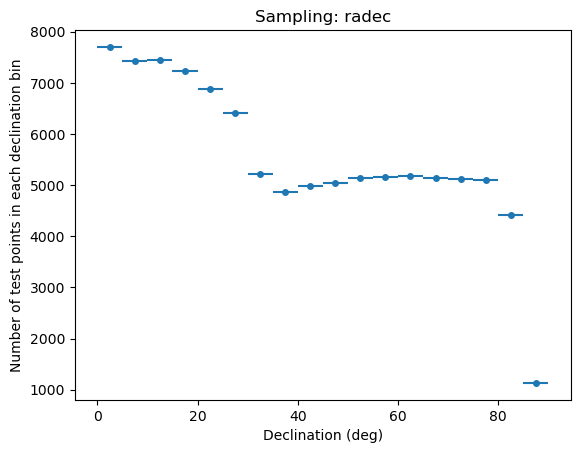

In [170]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

### Pasiphae Southern grid

In [171]:
fov = Angle(35. * u.arcmin)
psf = Angle(10. * u.arcsec)
overlap_ns = fov / 2. + psf
overlap_ew = psf
tilt = Angle(0.* u.deg)
dec_lim_north = fov / 2.
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 62619


In [172]:
time_estimate(grid, time_obs=3.5, hours_per_night_avg=8., good_months=4.5, efficiency=1.)

Total hours:   3653
Total nights:   457
Total years:    3.3


#### Show

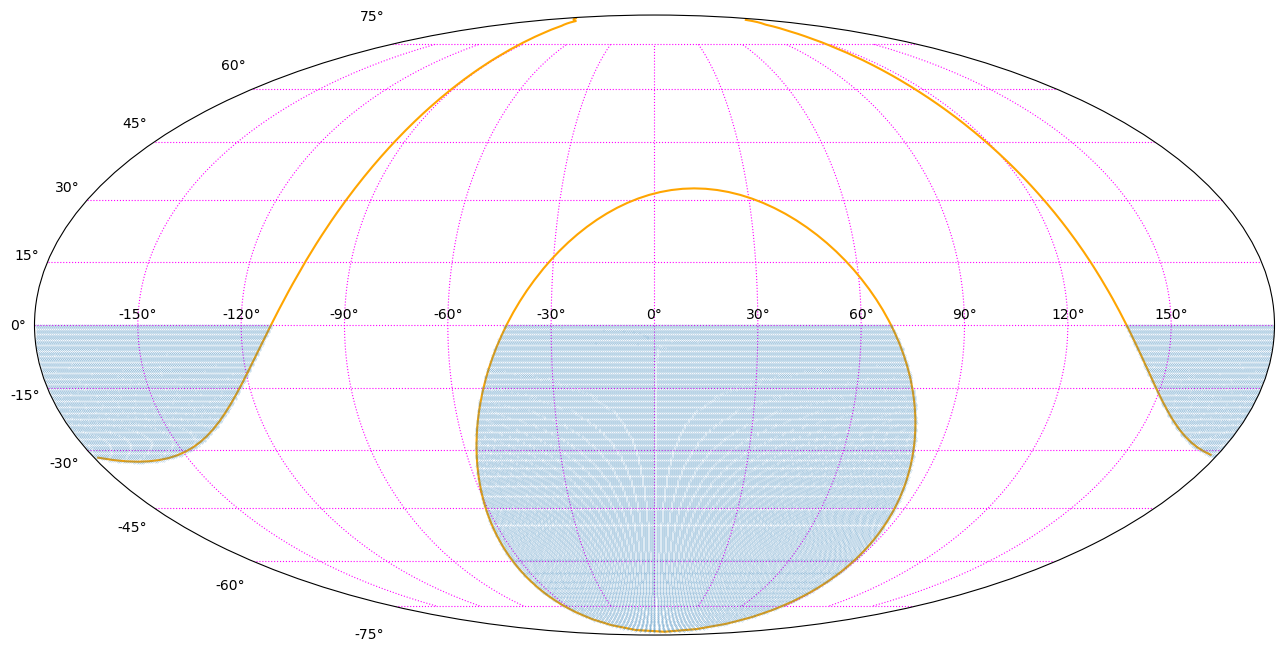

In [173]:
visualizer.mollweide(grid, b_lim=np.radians(30), ms=0.2, alpha=0.5);

Zoom on some region to visualize the grid setup:

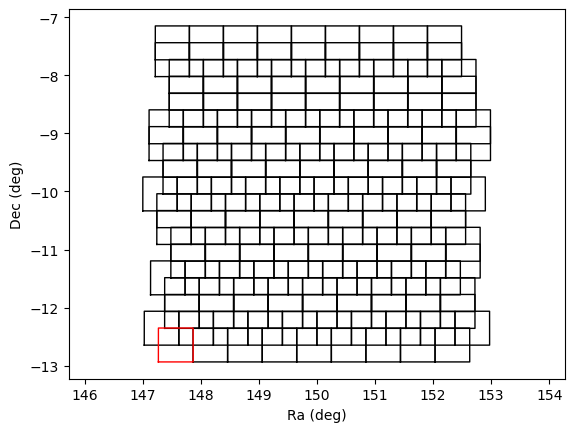

In [174]:
ra_center = Angle(150 * u.deg)
dec_center = Angle(-10 * u.deg)
radec_range = Angle(6 * u.deg)

sel = np.logical_and.reduce([
        np.all(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
        np.all(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
        ])
for i in range(np.sum(sel)):
    ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
    dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
    if i == 0:
        plt.plot(ra, dec, linestyle='-', lw=1, color='r', zorder=1)
    else:
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)
plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
plt.gca().axis('equal')
plt.xlabel('Ra (deg)')
plt.ylabel('Dec (deg)');

#### Run tests with spherical sampler

In [175]:
load = True
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 62619
Test points: 100000

In [176]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Run tests with radec sampler

In [177]:
load = True
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

if load:
    with open(filename, mode='rb') as f:
        tester = pickle.load(f)
        print('FieldGridTester loaded.\n')
else:
    tester = fieldgrid.FieldGridTester(grid, sampler=sampler)
    print('New FieldGridTester created.\n')
    
tester

FieldGridTester loaded.



FieldGridTester
Grid type: isolatitudinal grid
Fields: 62619
Test points: 100000

In [178]:
updated = tester.test(100000)

if updated:
    with open(filename, mode='wb') as f:
        pickle.dump(tester, f)

Test points requested: 100000
Test points stored:    100000
Test points needed:         0
Done.


#### Test for gaps

In [179]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [180]:
gaps = pd.DataFrame(tester.summary(get=True))

Gaps found: 0


##### Where are gaps located?

In [181]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [182]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 0
gaps = results.loc[sel, ('ra', 'dec')].reset_index(drop=True)

In [183]:
if gaps.shape[0]:
    visualizer = vis.FieldGridVisualizer()
    __, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
    ax.plot(np.where(gaps['ra']>np.pi, gaps['ra']-2*np.pi, gaps['ra']), gaps['dec'], ls='None', marker='o', ms=2)
else:
    print('There are no gaps.')

There are no gaps.


#### Test for overlap

In [184]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [185]:
fractions = pd.DataFrame(tester.summary(get=True))
print()
fractions

Sky fraction with gaps:                 0.0e+00
Sky fraction with single field:         0.5 %
Sky fraction with overlapping fields:  99.5 %



region  n_points  fraction
0                  gaps         0   0.00000
1          single field       459   0.00459
2  2 fields overlapping     96256   0.96256
3  3 fields overlapping      3121   0.03121
4  4 fields overlapping       157   0.00157
5  5 fields overlapping         5   0.00005

#### Where are points located that are only covered by single fields?

In [186]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [187]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] == 1
results = results.loc[sel].reset_index(drop=True)

/home/skiehl/Projects/Astrophysics/Pasiphae/pasiphae-field-grid/visualizations.py:452: UserWarning: No field grids provided. Either provide during instance creation or through plotting method.
  warnings.warn(


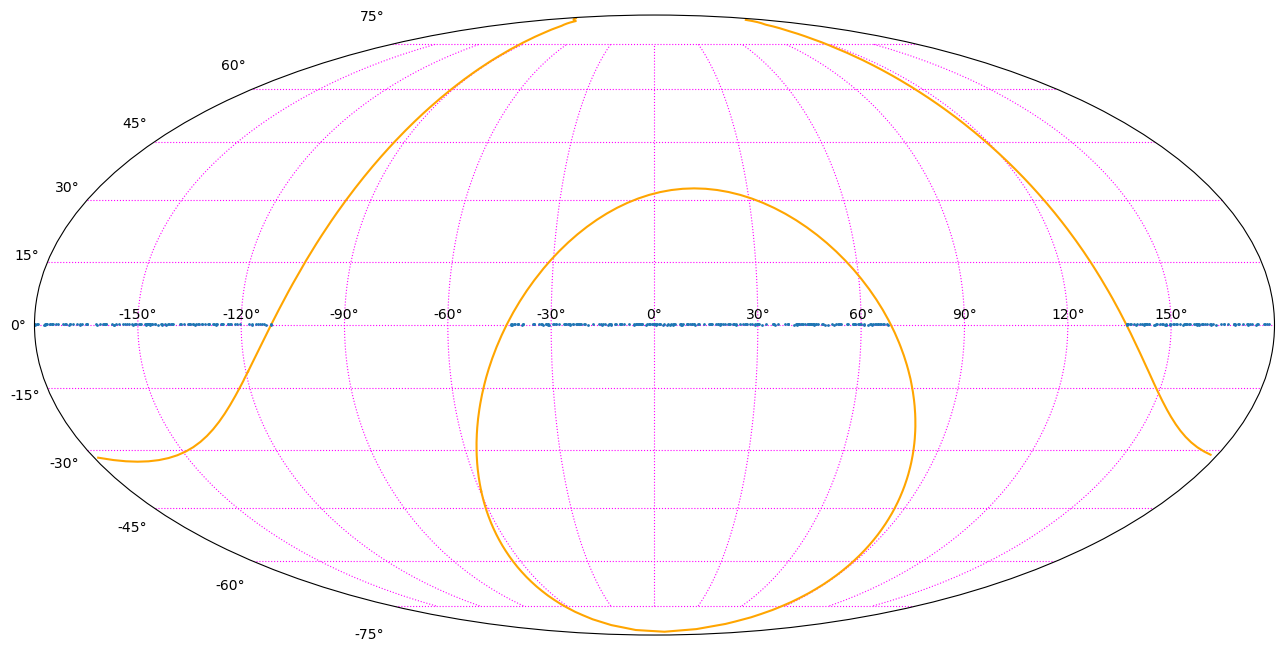

In [188]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

In [189]:
results = pd.DataFrame(tester.get_results())
n_points = results.shape[0]
sel = np.logical_and(results['n_fields'] == 1, results['dec'] < 0)
results = results.loc[sel].reset_index(drop=True)
print(f'total: {results.shape[0]} out of {n_points}\nratio: {results.shape[0] / n_points:.2e}')

total: 0 out of 100000
ratio: 0.00e+00


In [190]:
i  = 0

try:
    ra_center = Angle(results.loc[i, 'ra'] * u.rad)
    dec_center = Angle(results.loc[i, 'dec'] * u.rad)
    radec_range = Angle(1 * u.deg)

    sel = np.logical_and.reduce([
            np.any(grid.corner_ras > ra_center.rad - radec_range.rad / 2., axis=1),
            np.any(grid.corner_ras < ra_center.rad + radec_range.rad / 2., axis=1),
            np.any(grid.corner_decs > dec_center.rad - radec_range.rad / 2., axis=1),
            np.any(grid.corner_decs < dec_center.rad + radec_range.rad / 2., axis=1)
            ])
    for i in range(np.sum(sel)):
        ra = np.degrees(np.r_[grid.corner_ras[sel][i], grid.corner_ras[sel][i][0]])
        dec = np.degrees(np.r_[grid.corner_decs[sel][i], grid.corner_decs[sel][i][0]])
        plt.plot(ra, dec, linestyle='-', lw=1, color='k', zorder=0)

    plt.plot(ra_center.deg, dec_center.deg, marker='o', color='r')
    plt.xlim(ra_center.deg - radec_range.deg, ra_center.deg + radec_range.deg)
    plt.ylim(dec_center.deg - radec_range.deg, dec_center.deg + radec_range.deg)
    plt.xlabel('Ra (deg)')
    plt.ylabel('Dec (deg)');
except:
    pass

#### Where are overlapping areas located?

In [191]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [192]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 1
results = results.loc[sel].reset_index(drop=True)

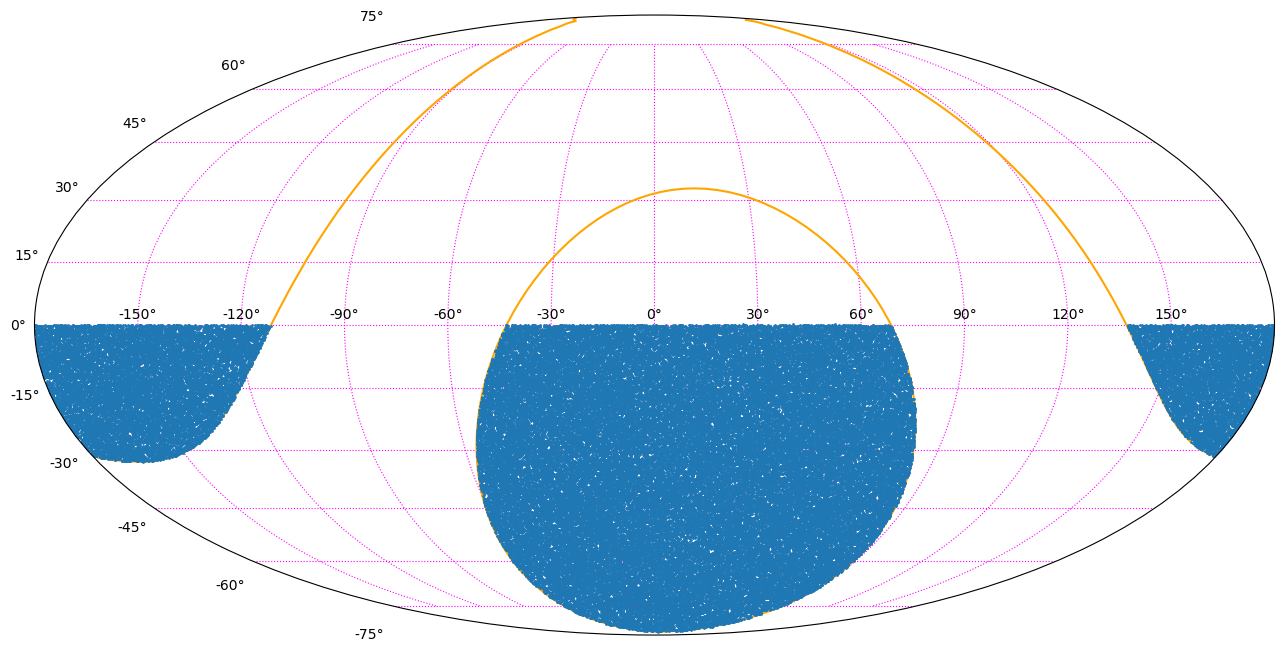

In [193]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### Where are more than two fields overlapping?

In [194]:
sampler='spherical'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [195]:
results = pd.DataFrame(tester.get_results())
sel = results['n_fields'] > 2
results = results.loc[sel].reset_index(drop=True)

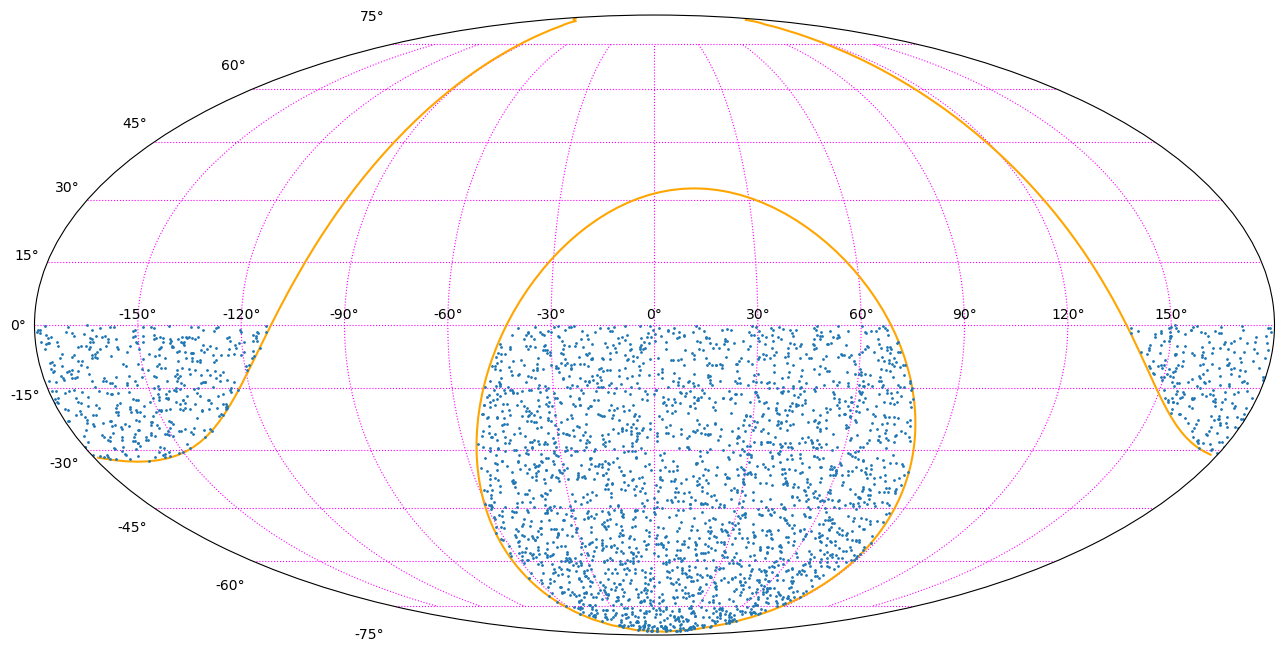

In [196]:
visualizer = vis.FieldGridVisualizer()
__, ax = visualizer.mollweide(b_lim=np.radians(30), ms=0.2, alpha=0.5)
ax.plot(np.where(results['ra']>np.pi, results['ra']-2*np.pi, results['ra']), results['dec'], ls='None', marker='o', ms=1);

#### How does the fraction of overlapping regions change with declination?

In [197]:
sampler='radec'
filename = f'gridtests/GridIsoLatOLplus_S_{sampler}.pickle'

with open(filename, mode='rb') as f:
    tester = pickle.load(f)

In [198]:
results = pd.DataFrame(tester.get_results())

dec_bin_step = 5 # degrees

dec_bins_deg = np.arange(-90, 0.1, dec_bin_step)
dec_bins_rad = np.radians(dec_bins_deg)
dec_bin_centers_deg = (dec_bins_deg[:-1] + dec_bins_deg[1:]) / 2
fraction_overlap = np.zeros(dec_bin_centers_deg.shape[0])
n_points = np.zeros(dec_bin_centers_deg.shape[0], dtype=int)

for i, (dec_lim_lo, dec_lim_hi) in enumerate(zip(dec_bins_rad[:-1], dec_bins_rad[1:])):
    sel = np.logical_and(results['dec'] >= dec_lim_lo, results['dec'] < dec_lim_hi)
    n_overlap = np.sum(results.loc[sel, 'n_fields'] > 1)
    n_tot = np.sum(sel)
    fraction_overlap[i] = n_overlap / n_tot
    n_points[i] = n_tot

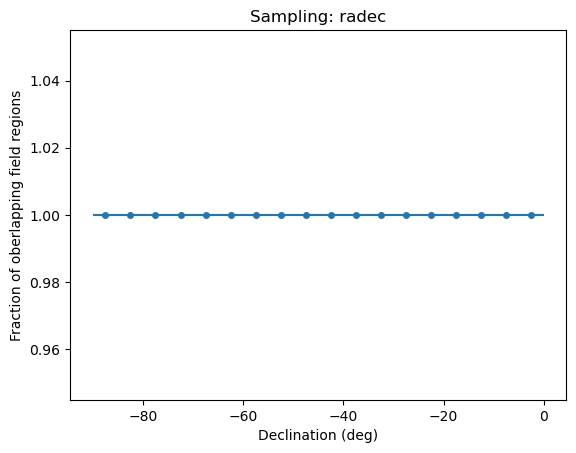

In [199]:
plt.errorbar(dec_bin_centers_deg, fraction_overlap, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Fraction of oberlapping field regions')
plt.title(f'Sampling: {sampler}');

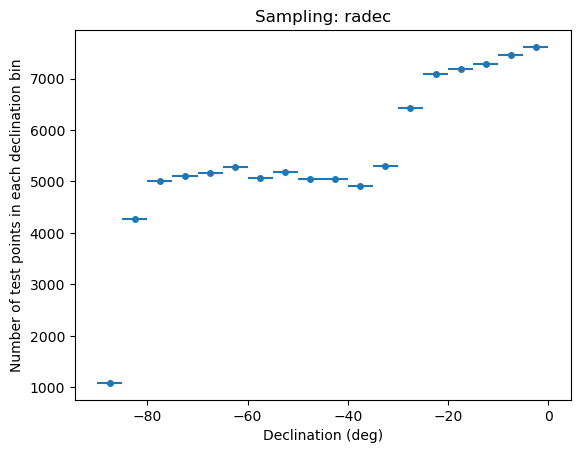

In [200]:
plt.errorbar(dec_bin_centers_deg, n_points, xerr=dec_bin_step/2, ls='None', marker='o', ms=4)
plt.xlabel('Declination (deg)')
plt.ylabel('Number of test points in each declination bin')
plt.title(f'Sampling: {sampler}');

In [201]:
fov = Angle(35. * u.arcmin)
overlap_ns = fov / 2.
overlap_ew = Angle(0. * u.arcmin)
tilt = Angle(0.* u.deg)
dec_lim_north = fov / 2.
dec_lim_south = Angle(-90. * u.deg)
gal_lat_lim = Angle(30. * u.deg)
gal_lat_lim_strict = True
verbose = 1

grid = fieldgrid.FieldGridIsoLat(
        fov.rad, overlap_ns=overlap_ns.rad, overlap_ew=overlap_ew.rad, tilt=tilt.rad, dec_lim_north=dec_lim_north.rad, 
        dec_lim_south=dec_lim_south.rad, gal_lat_lim=gal_lat_lim.rad, gal_lat_lim_strict=gal_lat_lim_strict, 
        verbose=verbose)

Create fields..
  Calculate field centers..
  Calculate field corners..
    Done                                                    
  Identify fields in Galactic plane..
Final number of fields: 61889
